# A remark on *Grid cells on steeply sloping terrain*

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


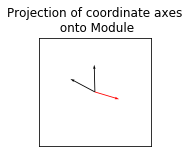

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2


m = 3
S = np.random.sample(m) + .8
k = 3
B, V, S = create_kd_hyper_module(m, k, scale=S)
V = np.zeros((m,k))


plt.figure(figsize=(2,2))
plt.title("Projection of coordinate axes\n onto Module")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([])
plt.yticks([])


r1 = B[0,0,:] / S[0]
r2 = B[0,1,:] / S[0]

plt.quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)
for l in range(2,k):
    plt.quiver(0.0,0.0,r1[l],r2[l], angles='xy', scale_units='xy', scale=1, color="red")

# plt.savefig("media/summary/{}d_orientations_m{}.pdf".format(k,m), dpi=150)
plt.show()






In [15]:

def get_fields_on_sloping_terrain(B, V, S, deg=40):
    theta = deg/180.*np.pi
    Rot   = np.array([
        [1.,0.,0.],
        [0., np.cos(theta), -np.sin(theta)],
        [0., np.sin(theta), np.cos(theta)]
    ])

    T = 30000

#     box = np.indices((100,100)).reshape((2,-1)).T
#     box = box/100.
#     print box.shape

    X_flat = np.zeros((T, 3))
    X_flat[:,:2] = np.random.sample((T,2)) - np.array([0.0,1.])


    X_ramp = np.zeros((T, 3))
    X_ramp[:,:2] = np.random.sample((T,2))


    X_ = np.concatenate([X_flat, X_ramp], axis=0)

    X_ramp = np.dot(X_ramp, Rot.T)

    X = np.concatenate([X_flat, X_ramp], axis=0)

    Q = map_to_hypertorus(B, V, X )
    P = map_to_hypertorus(B, V, np.zeros((2*T,3)))

    # D = M_dist_comp(Q,P, S=S)[:,0]
    D = M_dist_comp_unskewed(Q[:,0],P[:,0], B[0,:2,:2], S=S)

    weights = np.exp(- D**2/0.005)


    heat,_,_ = np.histogram2d(X_[:,0], X_[:,1],
                               weights=weights, 
                               bins=[
                                   np.linspace(0.,1., num=51),
                                   np.linspace(-1.,1., num=101)]);
    
    return heat[:,::-1]





In [16]:
from htmresearch.support.gridcells.utils import cross_correlate

fields = []
auto   = []

for _ in range(3):
    m = 1
    S = np.ones(m)*.75
    k = 3
    B, V, S = create_kd_hyper_module(m, k, scale=S)
    h = get_fields_on_sloping_terrain(B, V, S, deg=40)

    a1 = cross_correlate(h[:, :50], h[:, :50])
    a2 = cross_correlate(h[:, 50:], h[:, 50:])
    
    auto.append(np.concatenate([a1,a2], axis=1 ))
    fields.append(h)



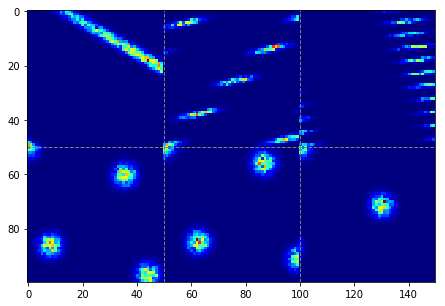

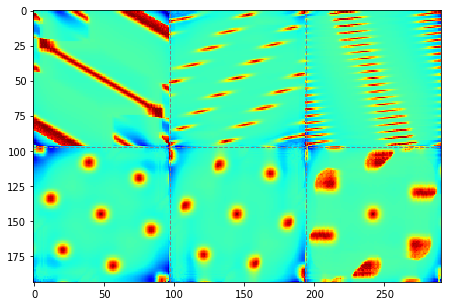

In [17]:
img = np.concatenate(fields, axis=0)
plt.figure(figsize=(10,5))
plt.imshow(img.T, cmap="jet")
for i in range(1,len(auto)):
    plt.axvline(i*50, lw=1., linestyle='--', color="gray")
plt.axhline(50, lw=1., linestyle='--', color="gray")
plt.show()


img = np.concatenate(auto, axis=0)
plt.figure(figsize=(10,5))
plt.imshow(img.T, cmap="jet")
for i in range(1,len(auto)):
    plt.axvline(i*97, lw=1., linestyle='--', color="gray")
plt.axhline(97, lw=1., linestyle='--', color="gray")
plt.show()


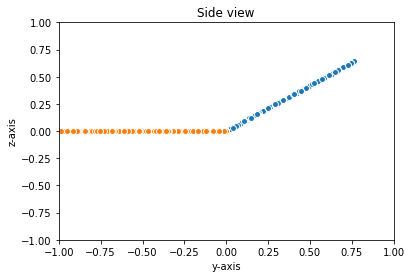

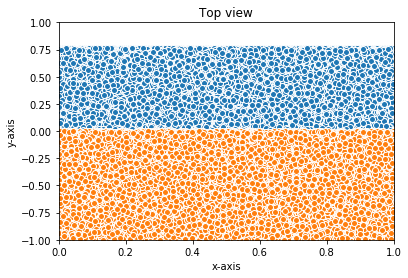

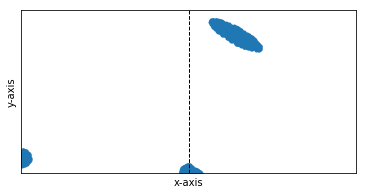

In [22]:
# print Q.shape

plt.title("Side view")
plt.scatter(X_ramp[:,1], X_ramp[:,2], edgecolor="white")
plt.scatter(X_flat[:,1], X_flat[:,2], edgecolor="white")
plt.xlabel("y-axis")
plt.ylabel("z-axis")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

plt.title("Top view")
plt.scatter(X_ramp[:,0], X_ramp[:,1], edgecolor="white")
plt.scatter(X_flat[:,0], X_flat[:,1], edgecolor="white")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.xlim(0,1)
plt.ylim(-1,1)
plt.show()



spikes = np.where(D < 0.05)[0]



plt.figure(figsize=(6,3))
# plt.title("Firing fields")
plt.scatter(X_[spikes,1], X_[spikes,0], marker=".", cmap="binary")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.xlim(-1,1)
plt.ylim(0,1)
plt.axvline(0., lw=1., linestyle='--', color="black")
plt.xticks([])
plt.yticks([])
plt.show()




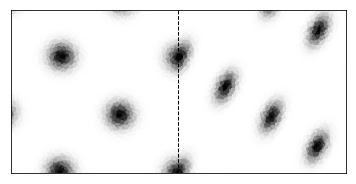

In [4]:
spikes = np.where(D < 0.2)[0]

weights = np.exp(- D**2/.005)

plt.figure(figsize=(6,3))
# plt.title("Firing fields")
plt.scatter(X_[spikes,1], X_[spikes,0], marker=".", c=weights[spikes] , cmap="binary")
plt.xticks([])
plt.yticks([])
plt.xlim(-1,1)
plt.ylim(0,1)
plt.axvline(0., lw=1., linestyle='--', color="black")

plt.show()




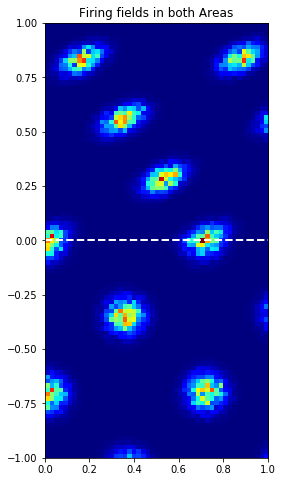

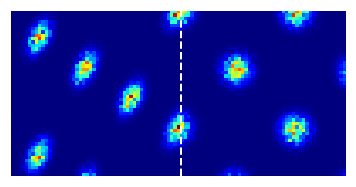

In [5]:
weights = np.exp(- D**2/0.005)

plt.figure(figsize=(4,8))
plt.title("Firing fields in both Areas")
heat,_,_,_ = plt.hist2d(X_[:,0], X_[:,1],weights=weights, bins=[np.linspace(0.,1., num=50),np.linspace(-1.,1., num=100)], cmap="jet");
plt.axhline(0., lw=2., linestyle='--', color="white")
plt.show()


plt.figure(figsize=(6,12), frameon=False)
plt.axis('off')
plt.imshow(heat[:,::-1], cmap="jet");
# plt.imshow(heat[:,::-1], cmap="binary");
plt.xticks([])
plt.yticks([])
plt.axvline(50., lw=2., linestyle='--', color="white")




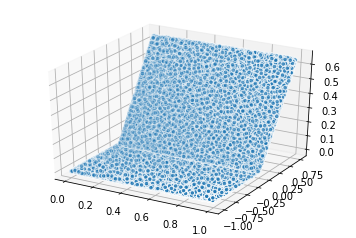

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], edgecolor="white", marker='o')
plt.show()

In [11]:
from scipy.stats import ortho_group



shape = (5,5)
imgs  = []
T = 10000

X_flat = np.zeros((T, 3))
X_flat[:,:2] = (np.random.sample((T,2)) - np.array([0.5,0.5]))*2.


for i in range(shape[0]):

    imgs.append([])
    for j in range(shape[1]):
        RndOrtho = ortho_group.rvs(3)


        X = np.dot(X_flat, RndOrtho.T)


        Q = map_to_hypertorus(B, V, X )
        P = map_to_hypertorus(B, V, np.zeros((T,3)))

        # D = M_dist_comp(Q,P, S=S)[:,0]
        heat = []
        for i_mod in range(m):
            D = M_dist_comp_unskewed(Q[:,i_mod],P[:,i_mod], B[i_mod,:2,:2], S=S)

            weights = np.exp(- D**2/0.005)
            h, _, _ = np.histogram2d(X_flat[:,0], X_flat[:,1], weights=weights, 
                                    bins=[
                                        np.linspace(-1.,1., num=51, endpoint=True),
                                        np.linspace(-1.,1., num=51,  endpoint=True)
                                    ]);
            heat.append(h)
        
        imgs[-1].append(np.concatenate(heat, axis=1))






In [50]:
from scipy.stats import ortho_group



shape = (5,6)
imgs  = []
T = 10000

X_flat = np.zeros((T, 3))
X_flat[:,:2] = (np.random.sample((T,2)) - np.array([0.5,0.5]))*2.


for i in range(20):
    imgs.append([])
    
    RndOrtho = ortho_group.rvs(3)

    X = np.dot(X_flat, RndOrtho.T)


    Q = map_to_hypertorus(B, V, X )

    C1 = np.zeros((T,3))
    P1 = map_to_hypertorus(B, V, C1)
    

    P1 =  np.zeros((T,m, 2))
    P2 =  np.zeros((T,m, 2))
    P2[:,:,0] = 0.5
    P2[:,:,1] = 0.0
    
    P3 =  np.zeros((T,m, 2))
    P3[:,:,0] = 0.0
    P3[:,:,1] = 0.5
    
    P4 =  np.zeros((T,m, 2))
    P4[:,:,0] = 0.5
    P4[:,:,1] = 0.5




    heat = []
    for i_mod in range(m):
            D1 = M_dist_comp_unskewed(Q[:,i_mod],P1[:,i_mod], B[i_mod,:2,:2], S=S)
            D2 = M_dist_comp_unskewed(Q[:,i_mod],P2[:,i_mod], B[i_mod,:2,:2], S=S)
            D3 = M_dist_comp_unskewed(Q[:,i_mod],P3[:,i_mod], B[i_mod,:2,:2], S=S)
            D4 = M_dist_comp_unskewed(Q[:,i_mod],P4[:,i_mod], B[i_mod,:2,:2], S=S)

            weights = np.exp(- D1**2/0.005)
            h1, _, _ = np.histogram2d(X_flat[:,0], X_flat[:,1], weights=weights, 
                                    bins=[
                                        np.linspace(-1.,1., num=51, endpoint=True),
                                        np.linspace(-1.,1., num=51,  endpoint=True)
                                    ]);
            weights = np.exp(- D2**2/0.005)
            h2, _, _ = np.histogram2d(X_flat[:,0], X_flat[:,1], weights=weights, 
                                    bins=[
                                        np.linspace(-1.,1., num=51, endpoint=True),
                                        np.linspace(-1.,1., num=51,  endpoint=True)
                                    ]);
            weights = np.exp(- D3**2/0.005)
            h3, _, _ = np.histogram2d(X_flat[:,0], X_flat[:,1], weights=weights, 
                                    bins=[
                                        np.linspace(-1.,1., num=51, endpoint=True),
                                        np.linspace(-1.,1., num=51,  endpoint=True)
                                    ]);
            
            weights = np.exp(- D4**2/0.005)
            h4, _, _ = np.histogram2d(X_flat[:,0], X_flat[:,1], weights=weights, 
                        bins=[
                            np.linspace(-1.,1., num=51, endpoint=True),
                            np.linspace(-1.,1., num=51,  endpoint=True)
                        ]);
            
            h1 = h1 - np.min(h1)
            h2 = h2 - np.min(h2)
            h3 = h3 - np.min(h3)
            h4 = h4 - np.min(h4)
            h1 = h1/np.amax(h1)
            h2 = h2/np.amax(h2)
            h3 = h3/np.amax(h3)
            h4 = h4/np.amax(h4)

# #             np.clip(h1, 0.,1.)
# #             np.clip(h2, 0.,1.)
            heat.append([h1, h2, h3, h4])

#             heat.append(np.concatenate([h1, h2, h3], axis=1))
            
    
#     imgs[-1].append(np.concatenate(heat, axis=1))
    imgs[-1].append(heat)






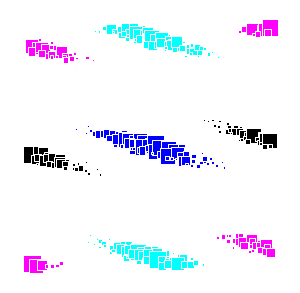

In [51]:
# img = np.concatenate( [ np.concatenate(row, axis=1) for row in imgs ], axis=0)

plt.figure(figsize=(5,5), frameon=False)
# plt.title("Firing fields")
# plt.imshow(imgs[0][0][0] > 0.5, cmap="Purples", alpha=0.5)
# plt.imshow(imgs[0][0][1] > 0.5, cmap="Greens", alpha=0.5)
# plt.imshow(imgs[0][0][2] > 0.5, cmap="Blues", alpha=0.5)


pix_ = np.indices((50,50)).reshape((2,-1)).T/50. + np.random.sample(size=(50**2,2))*0.02
np.clip(0,1,pix_)

pix = np.zeros(pix_.shape)
pix[:,0]= pix_[:,1]
pix[:,1]= 1. - pix_[:,0]

# colors = ["blue", "green", "magenta", "cyan"]
colors = ["blue", "magenta", "black", "cyan"]
for i in range(4):
    ff = imgs[0][0][0][i]
    thresh = 0.01
    size = 100
    valid = ff > thresh
    valid = valid.reshape(-1)
    cs = ff.reshape(-1)[valid]


    ec = "white"
    plt.scatter(pix[valid,0], pix[valid,1], marker="s", edgecolor=ec, s=cs*300,c=colors[i])#,cmap="Greens")
# for i in np.where(valid==True)[0]:
#     plt.scatter(pix[i,0], pix[i,1], marker="^",s=size, c="blue", alpha=ff.reshape(-1)[i])#,cmap="Greens")


# ff = imgs[0][0][0][1]
# valid = ff > thresh
# valid = valid.reshape(-1)
# cs = ff.reshape(-1)[valid]

# plt.scatter(pix[valid,0], pix[valid,1], marker="s", edgecolor=ec, s=size,c="cyan")#,cmap="Greens")
# # for i in np.where(valid==True)[0]:
# #     plt.scatter(pix[i,0], pix[i,1], marker="^",s=size, c="green", alpha=ff.reshape(-1)[i])#,cmap="Greens")




# ff = imgs[0][0][0][2]
# valid = ff > thresh
# valid = valid.reshape(-1)
# cs = ff.reshape(-1)[valid]

# plt.scatter(pix[valid,0], pix[valid,1], marker="o", edgecolor=ec,  s=size,c="magenta")#,cmap="Greens")
# # for i in np.where(valid==True)[0]:
# #     plt.scatter(pix[i,0], pix[i,1], marker="o",s=size, c="red", alpha=ff.reshape(-1)[i])#,cmap="Greens")



plt.axis('off')
# plt.imshow(heat[:,::-1], cmap="jet");
# # plt.imshow(heat[:,::-1], cmap="binary");
# for i in range(shape[0]):

# for i in range(1,shape[1]):
#     plt.axvline(i*50, lw=2., linestyle='-', color="white")
    
# for i in range(1,shape[0]):
#     plt.axhline(i*50, lw=2., linestyle='-', color="white")
plt.xticks([])
plt.yticks([])
plt.show()




0 of 20


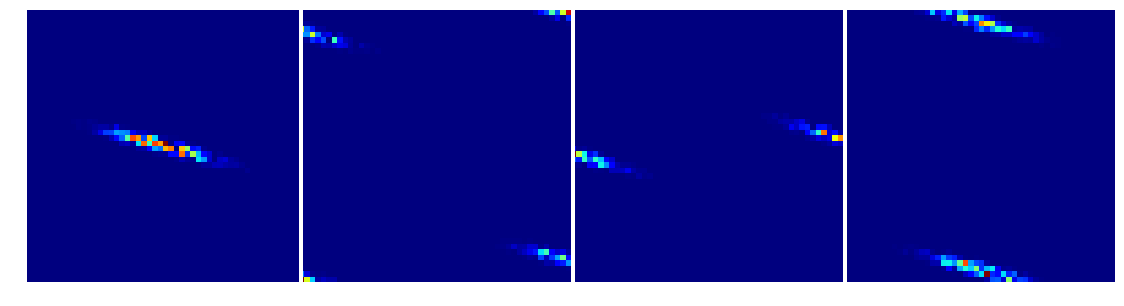

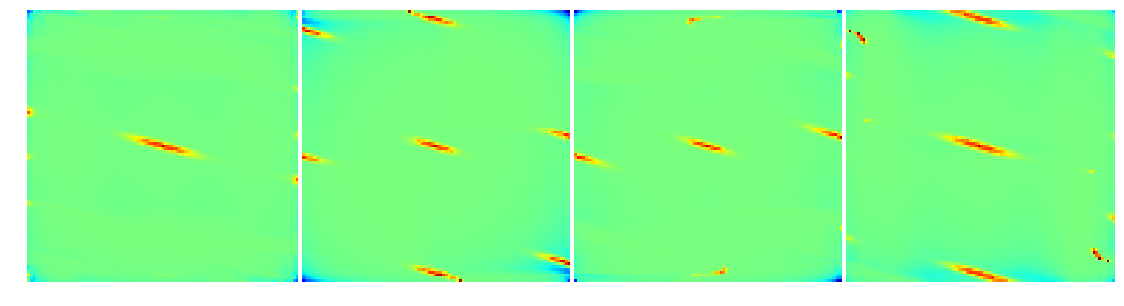

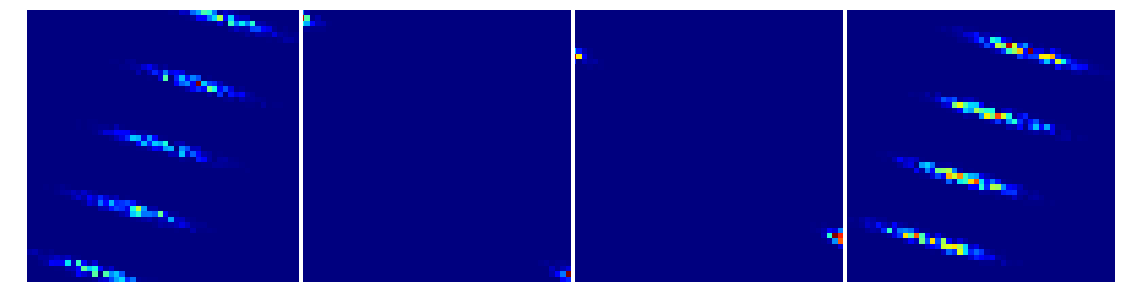

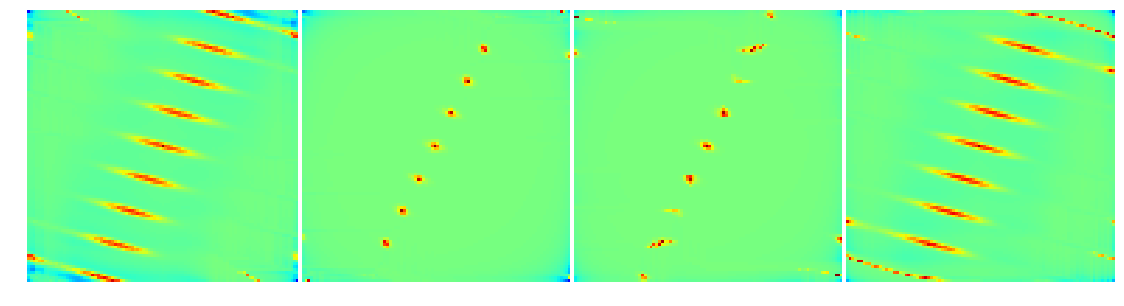

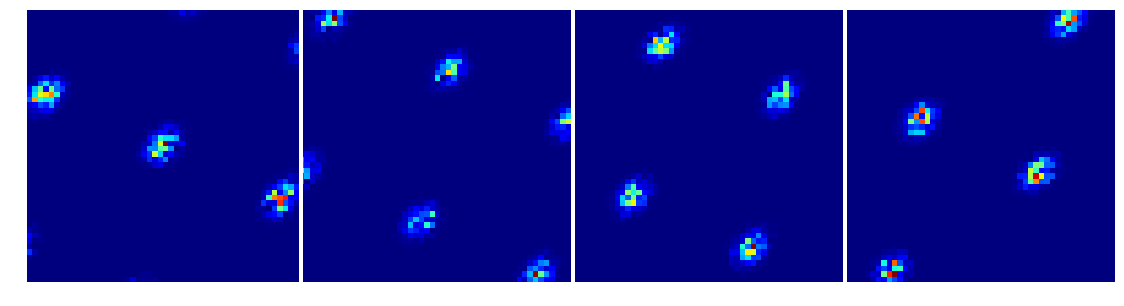

1 of 20


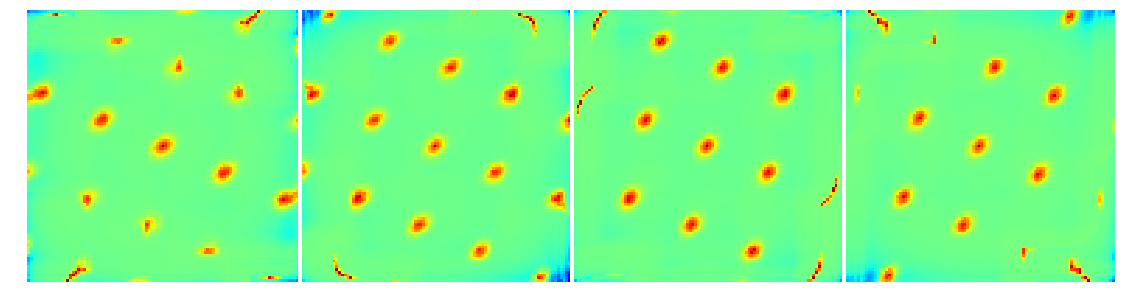

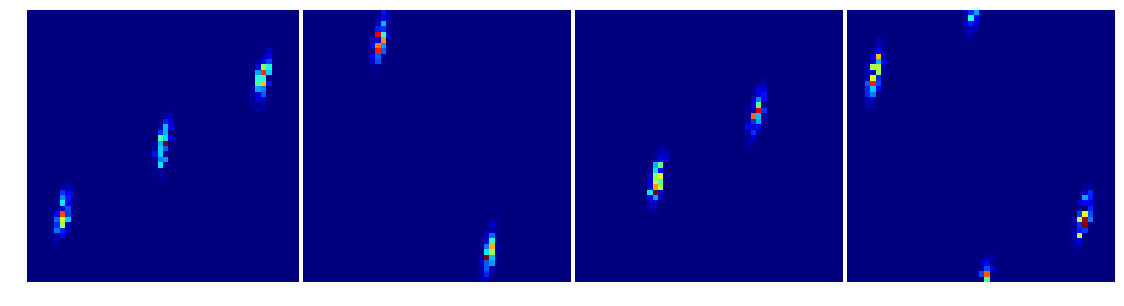

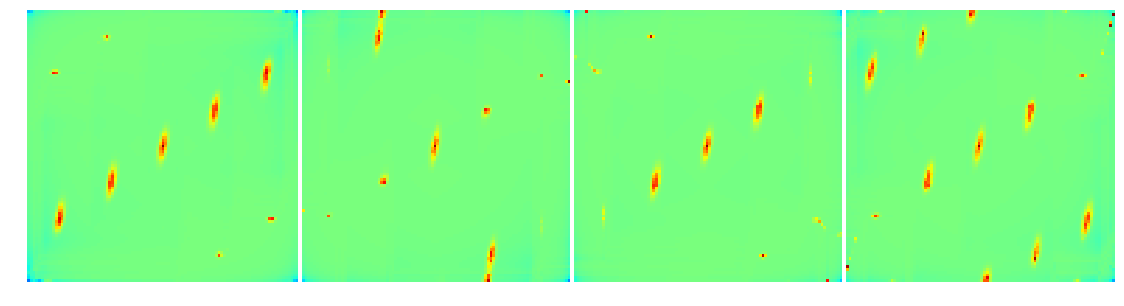

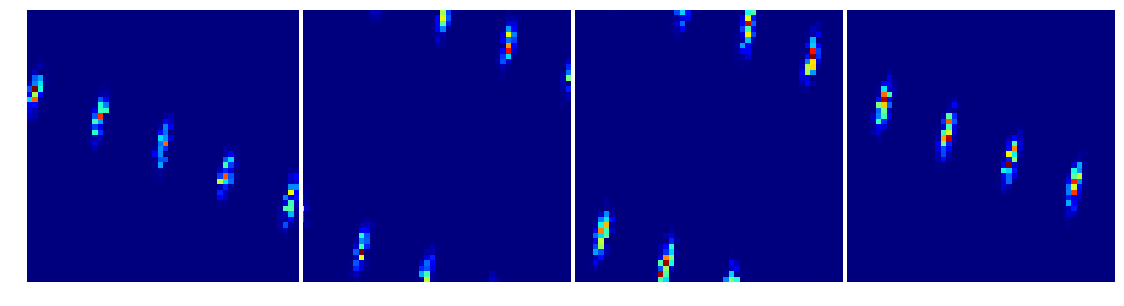

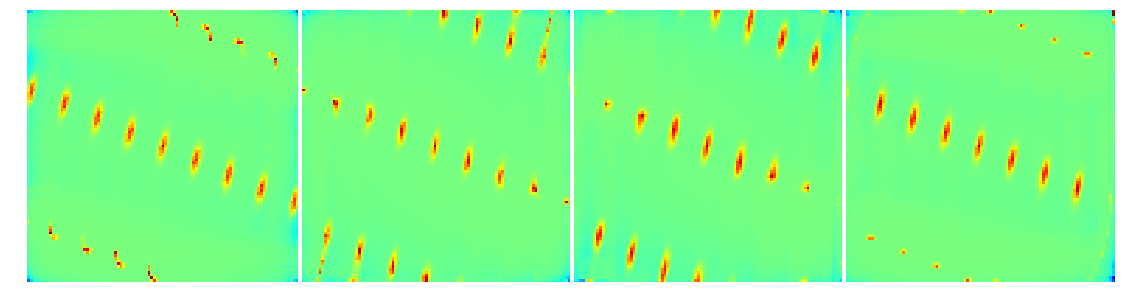

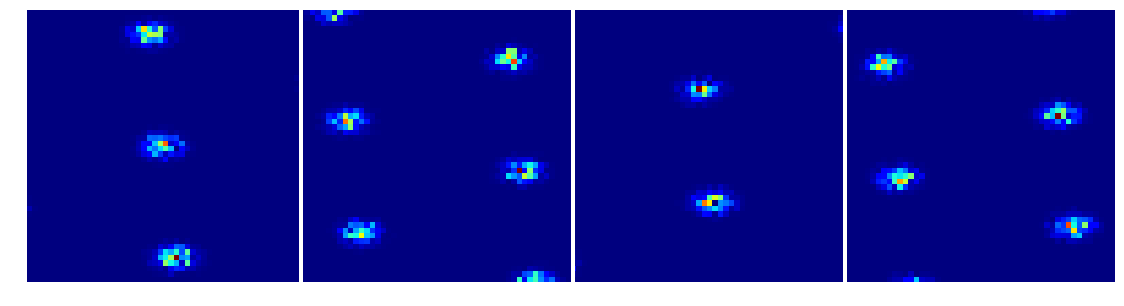

2 of 20


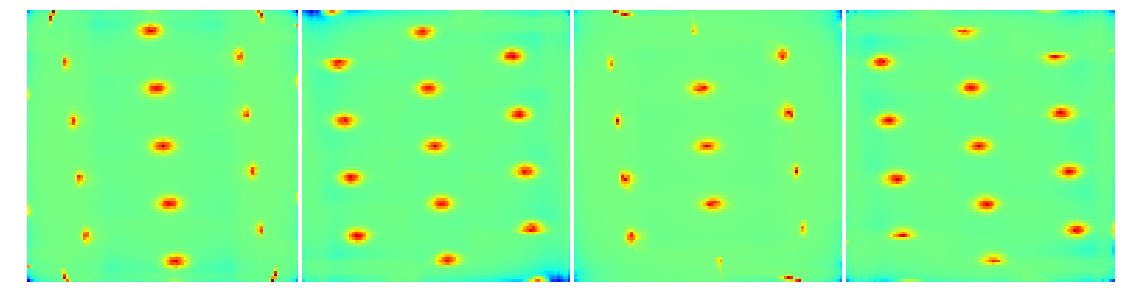

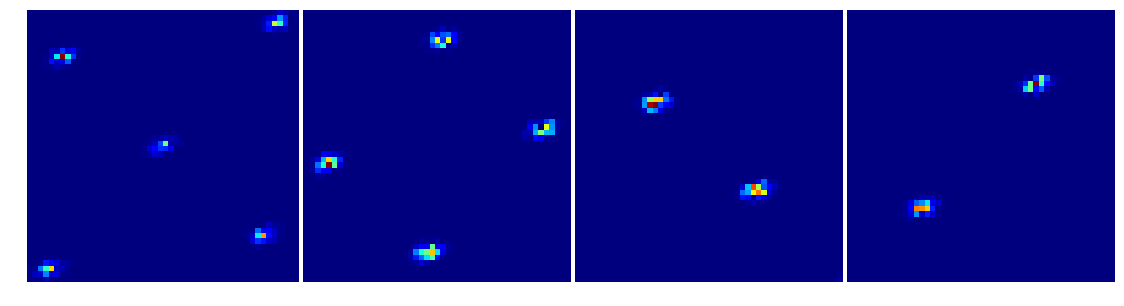

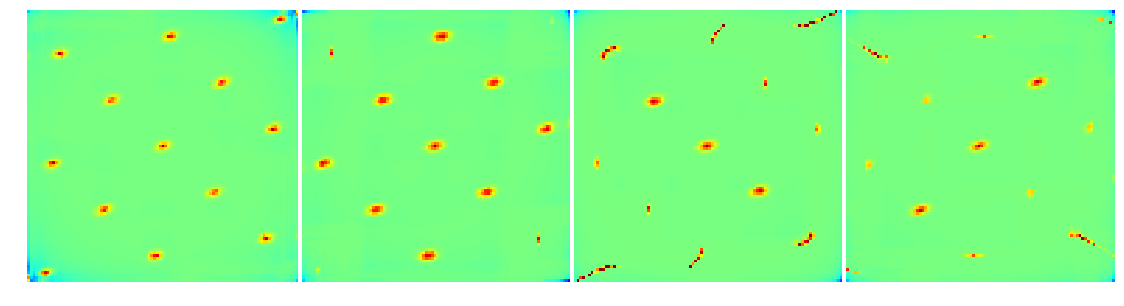

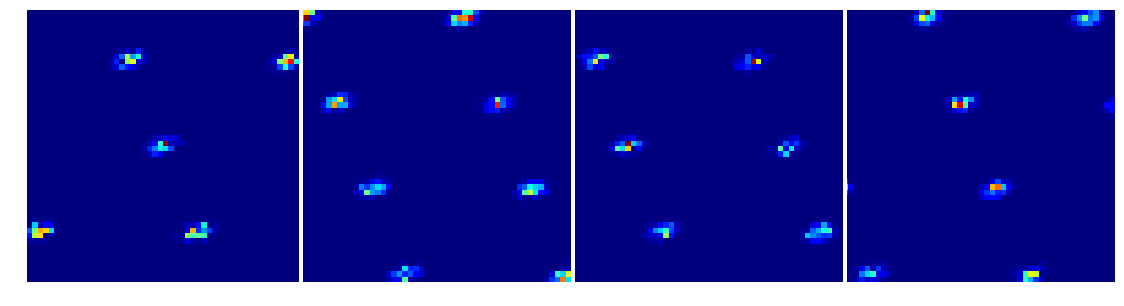

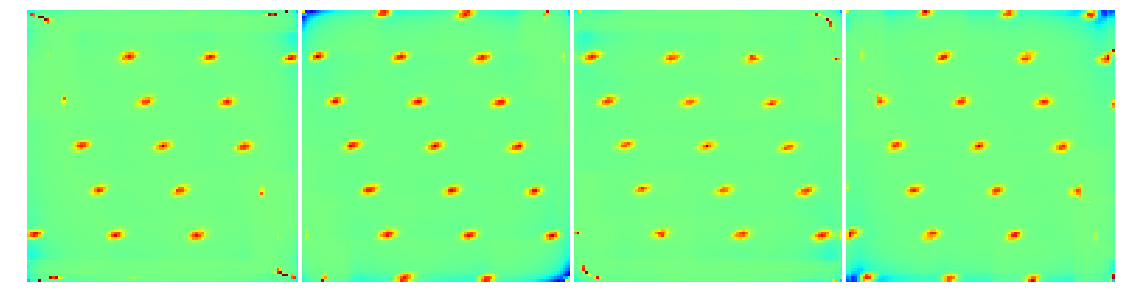

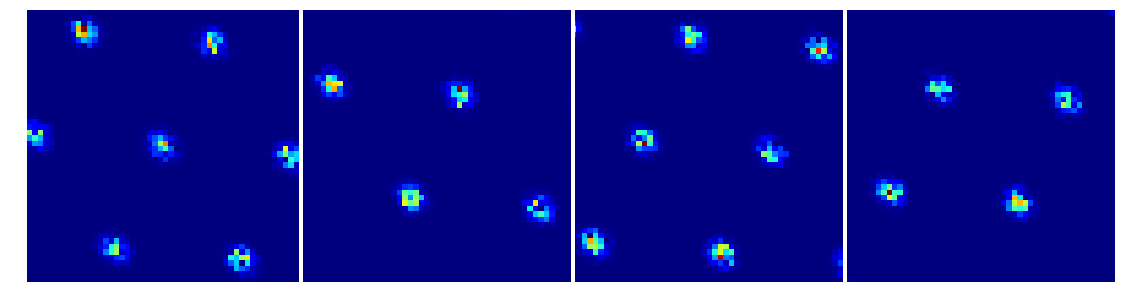

3 of 20


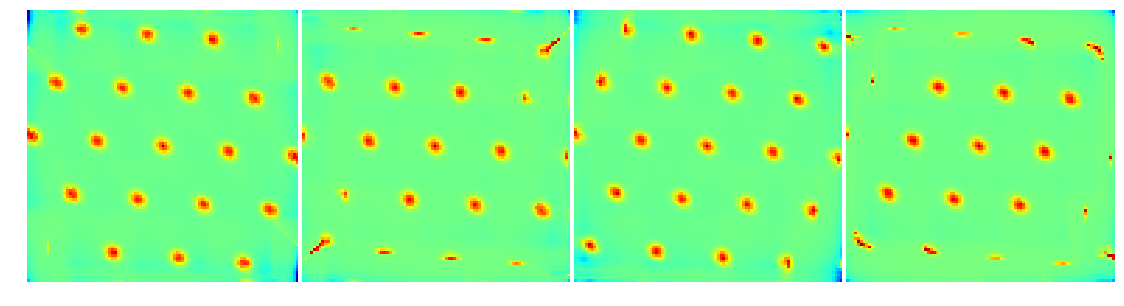

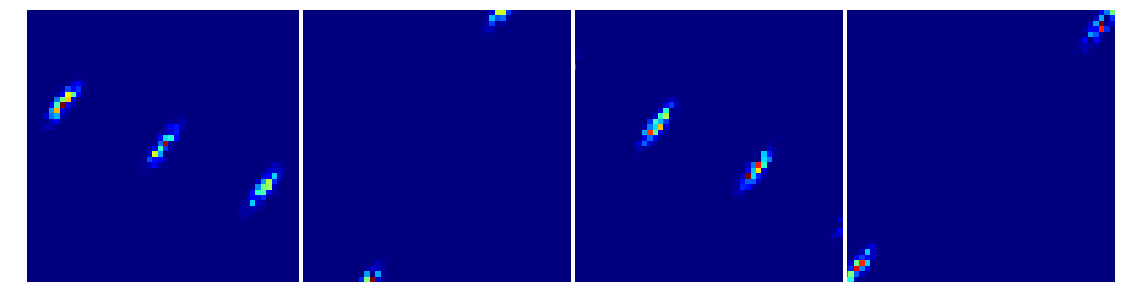

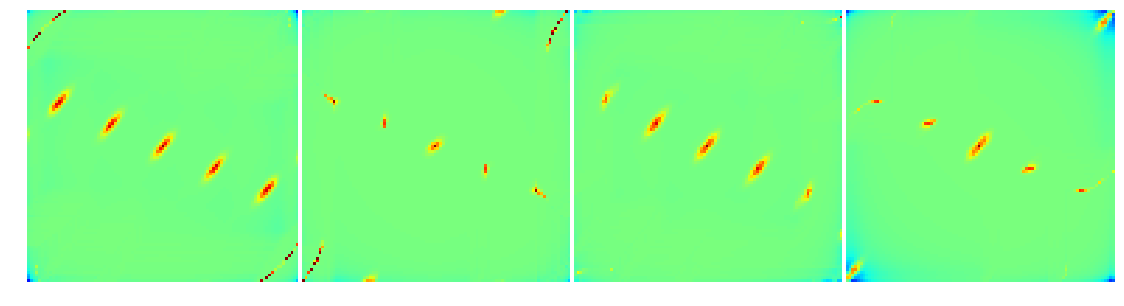

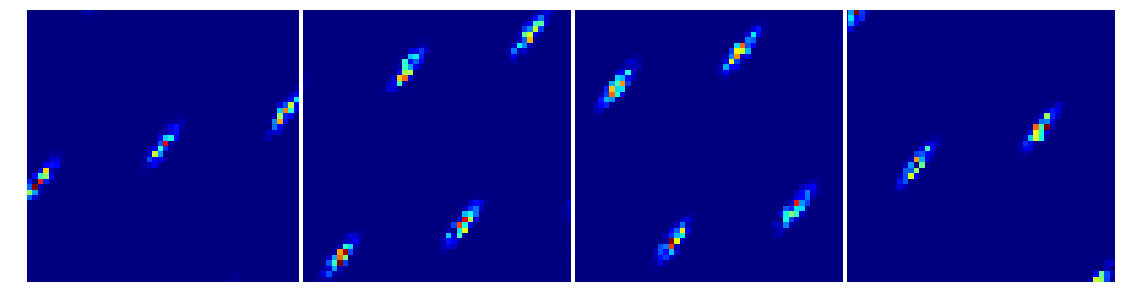

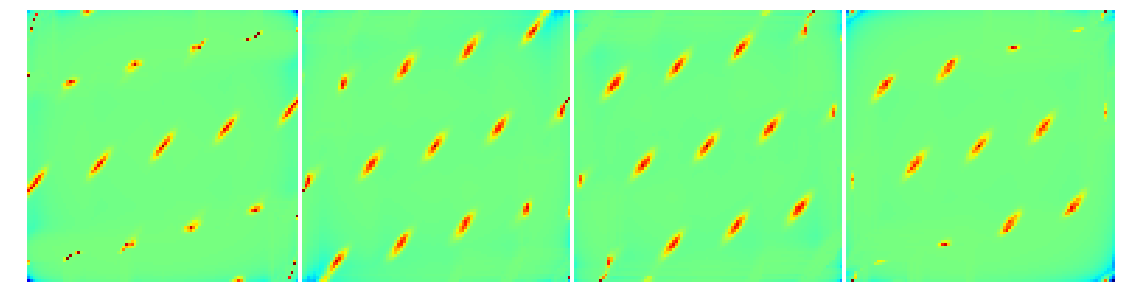

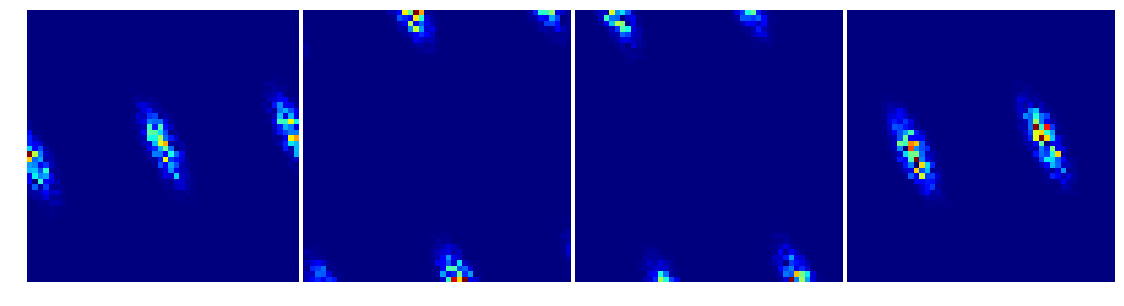

4 of 20


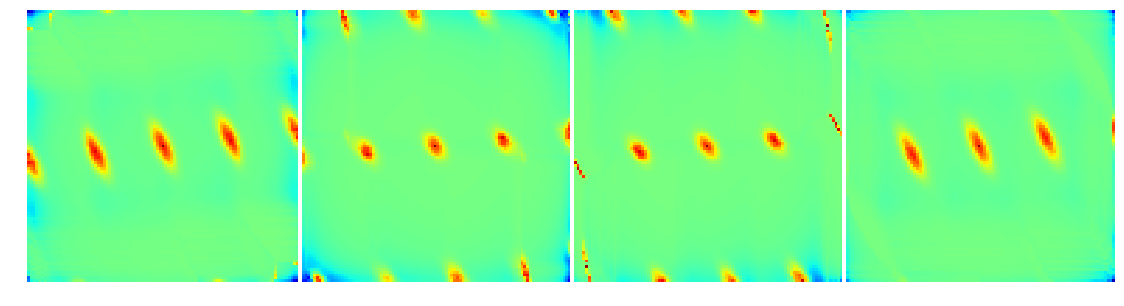

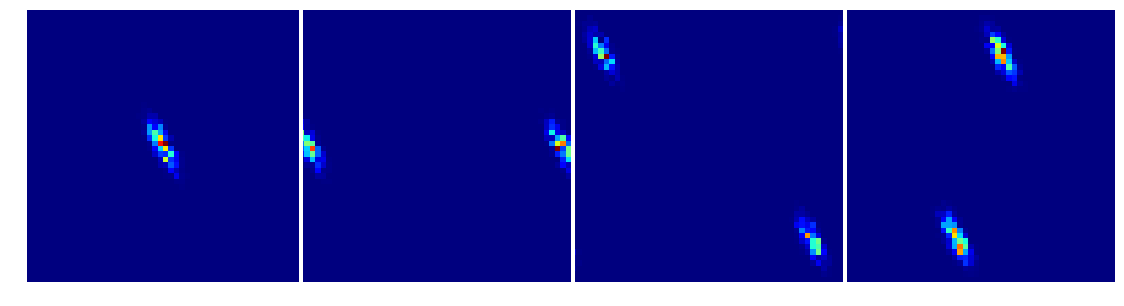

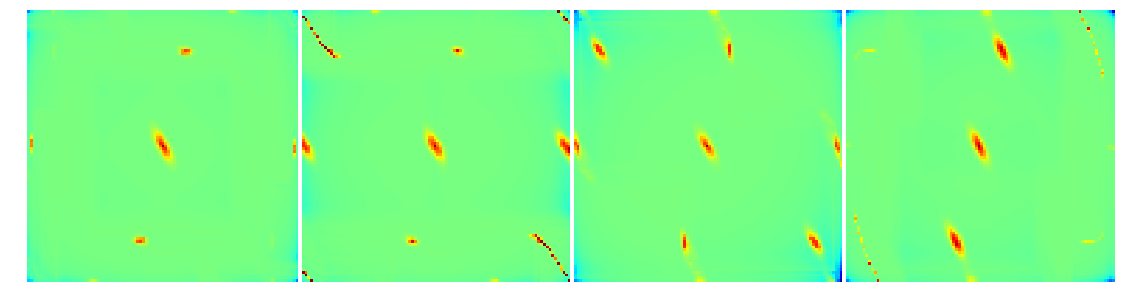

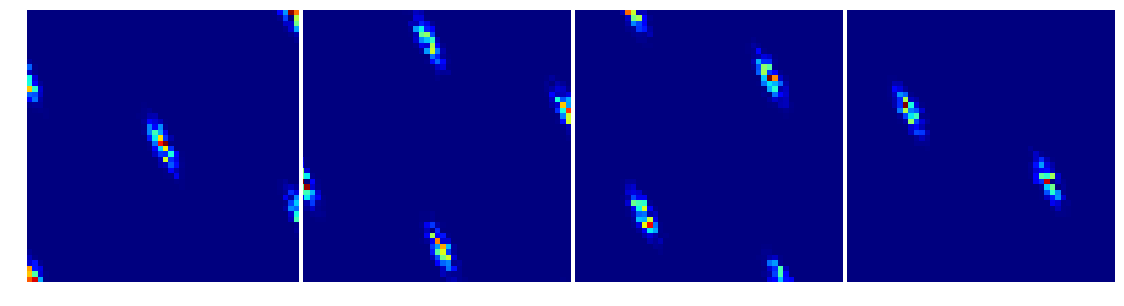

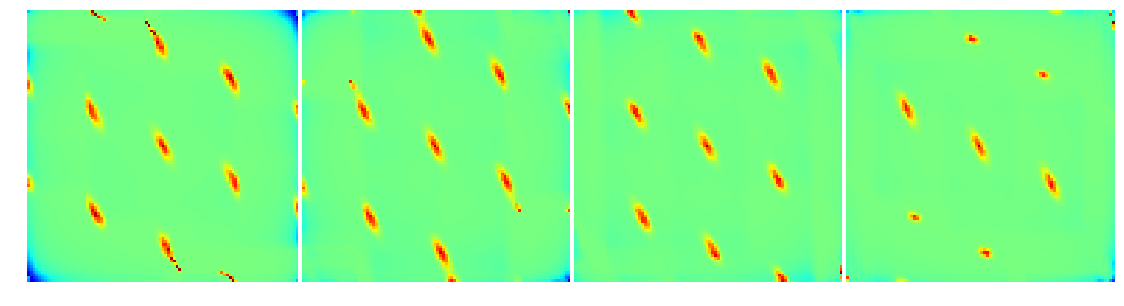

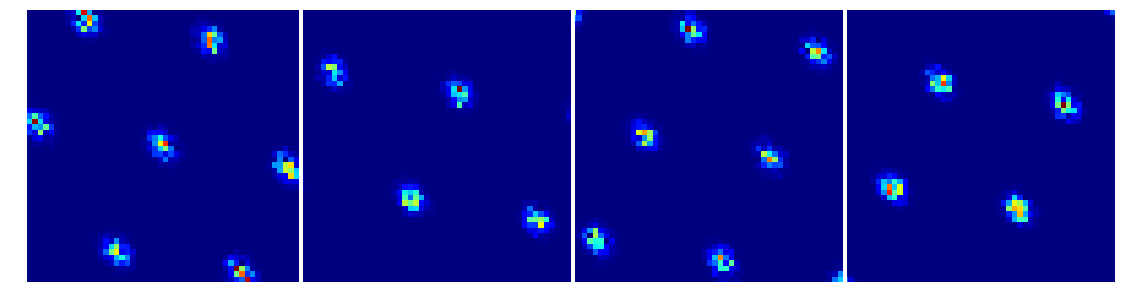

5 of 20


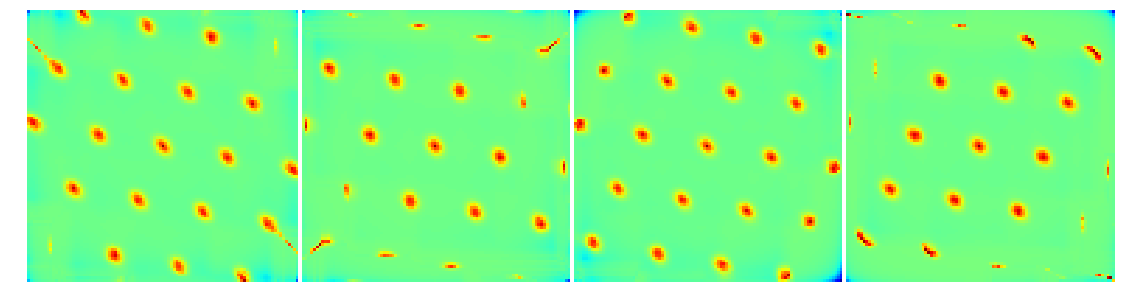

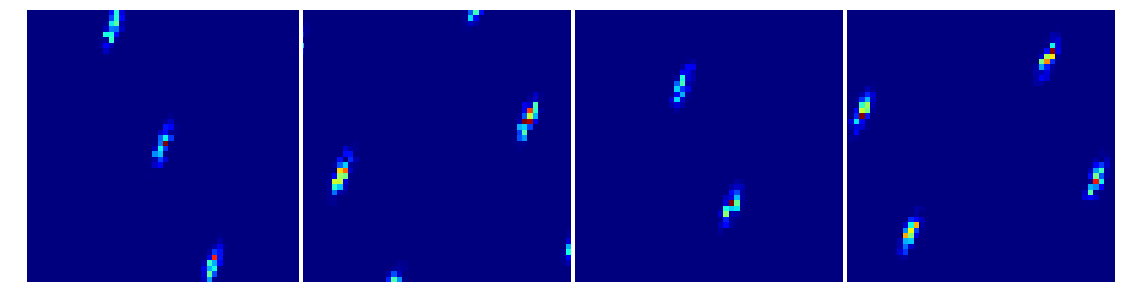

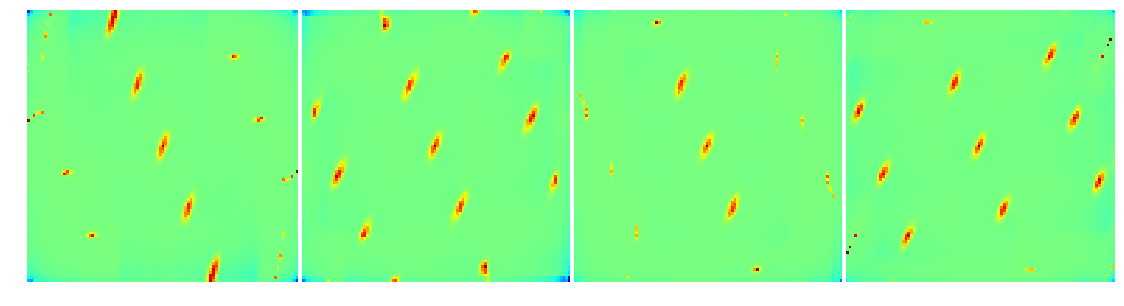

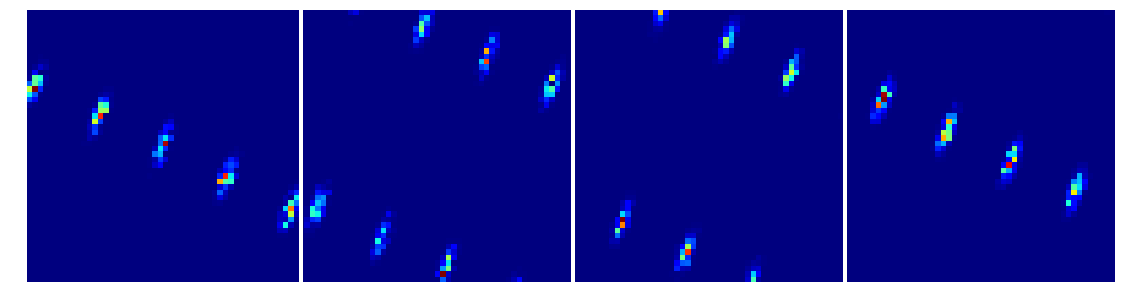

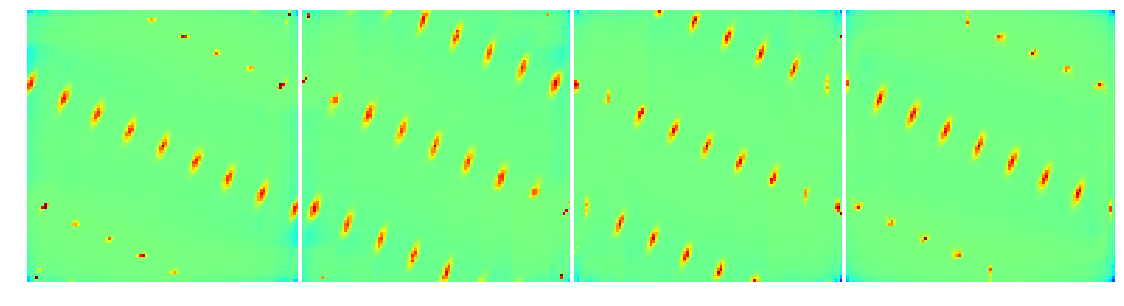

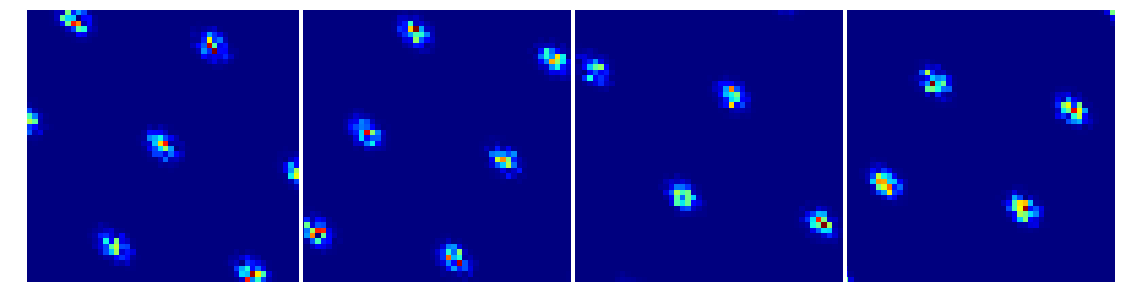

6 of 20


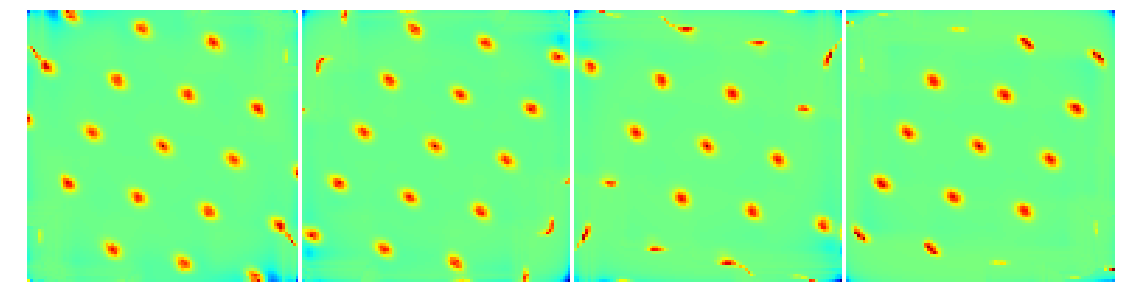

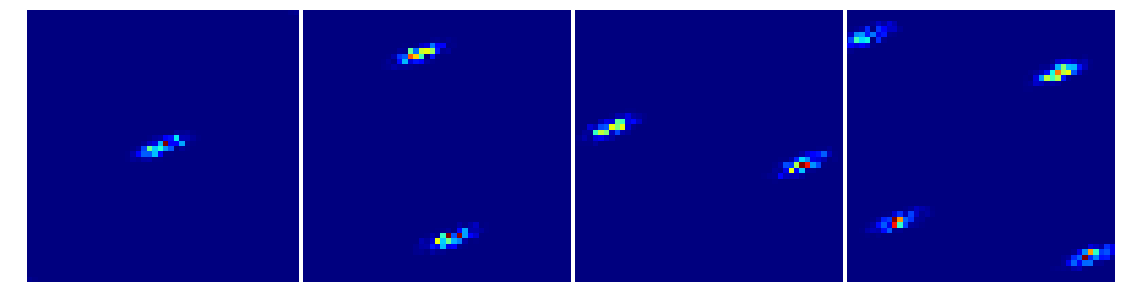

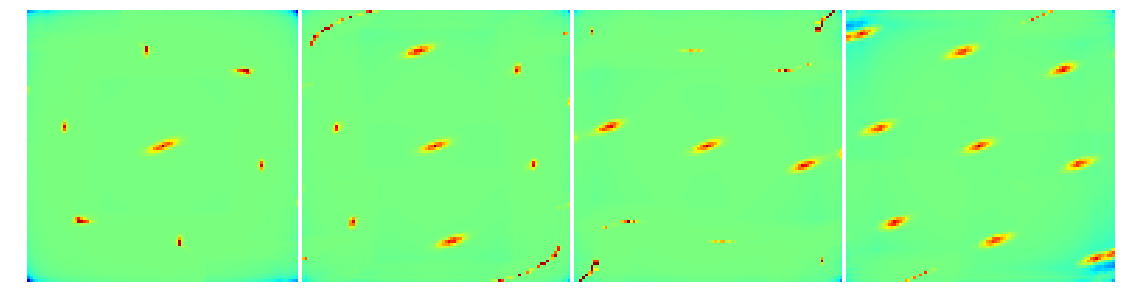

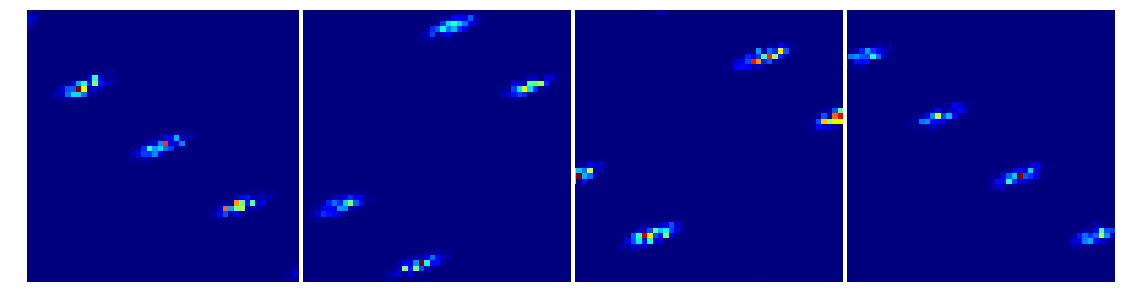

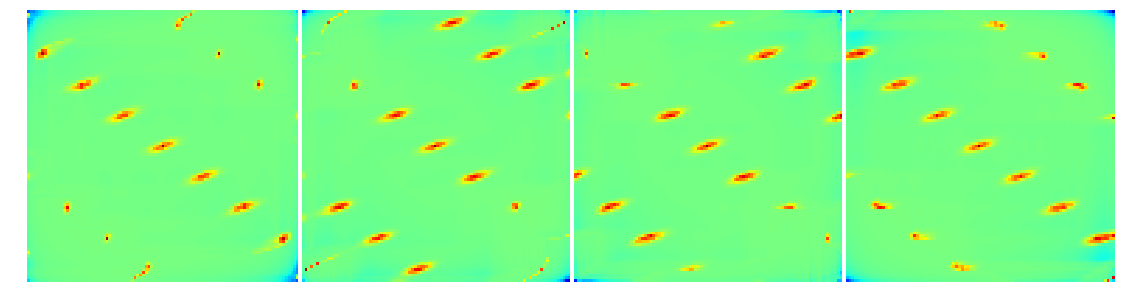

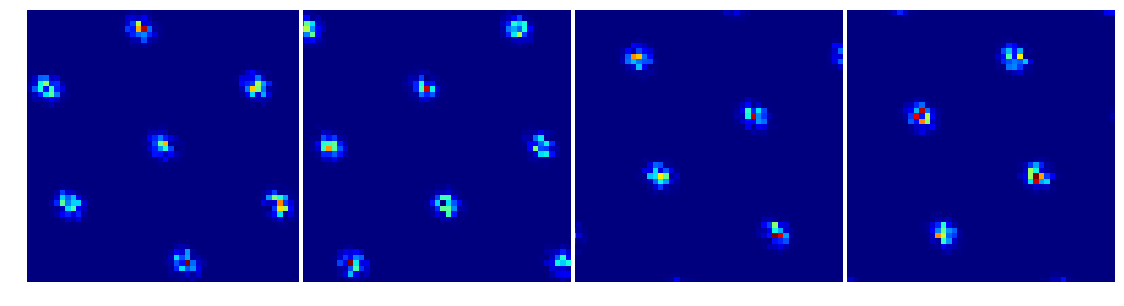

7 of 20


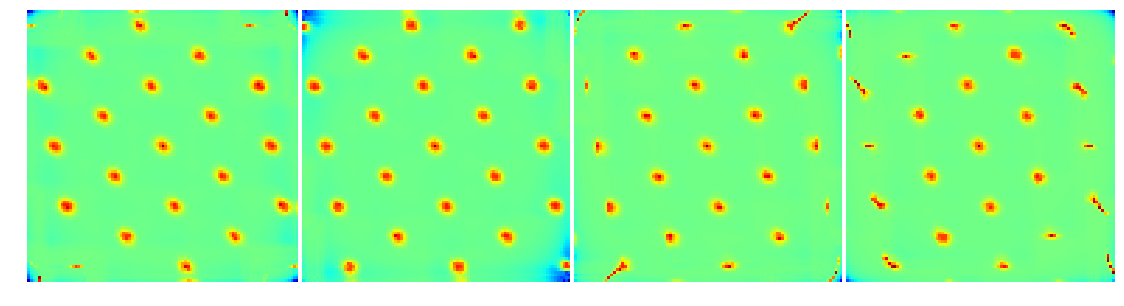

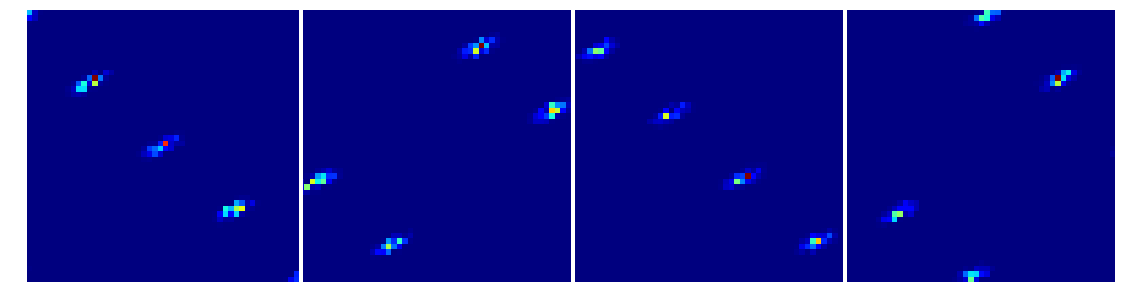

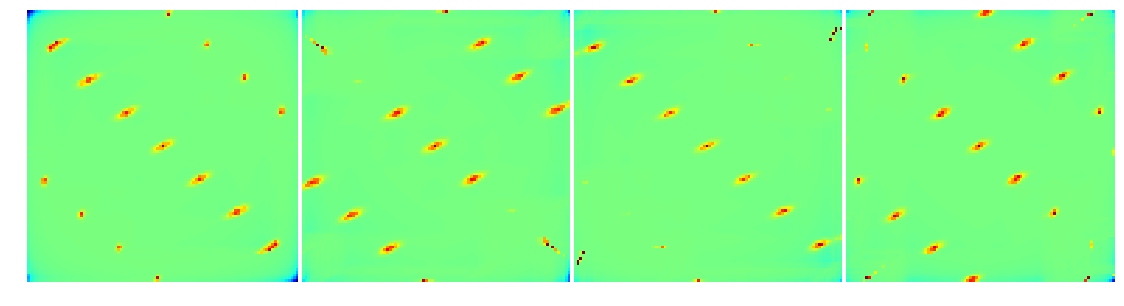

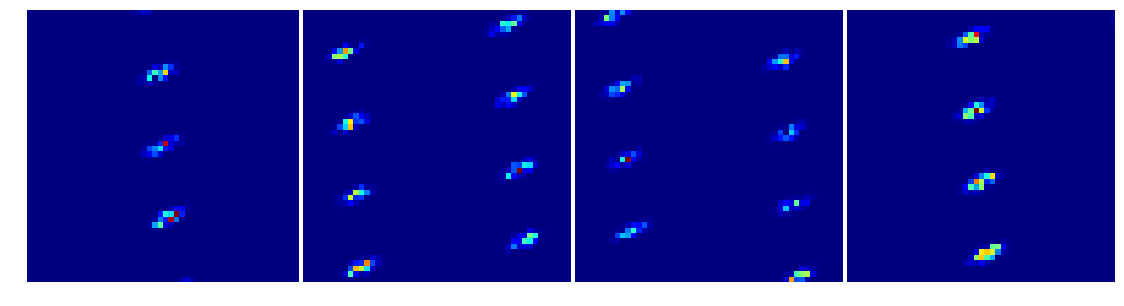

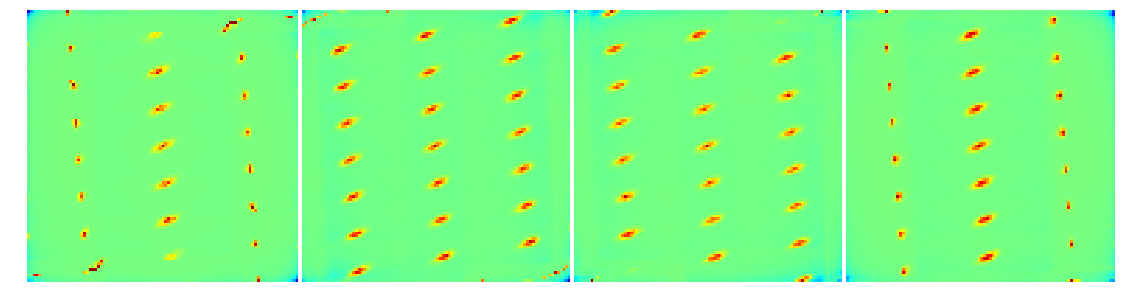

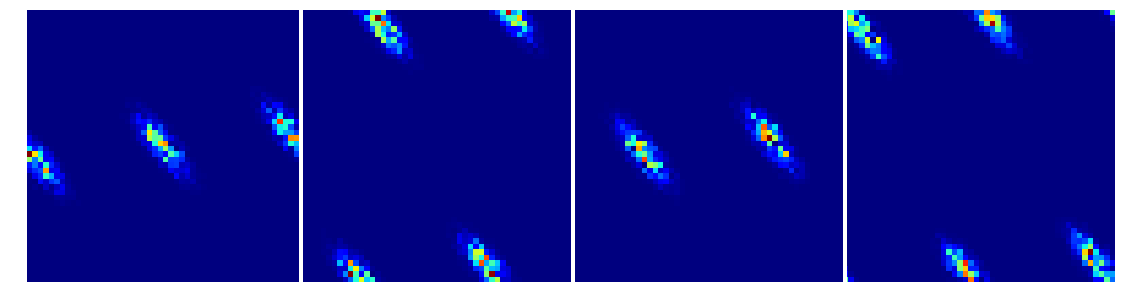

8 of 20


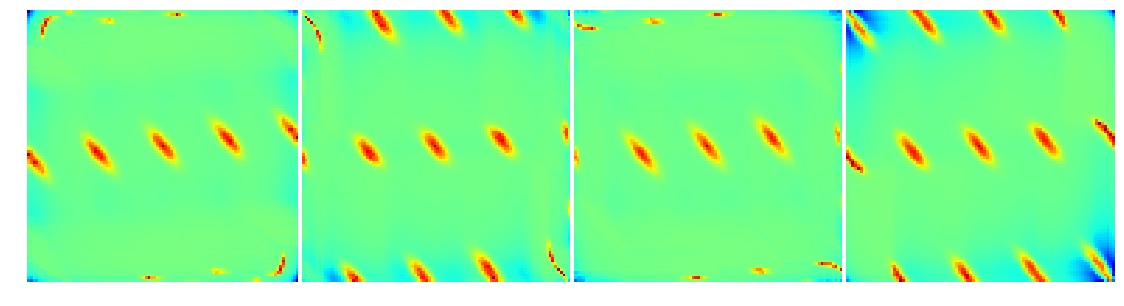

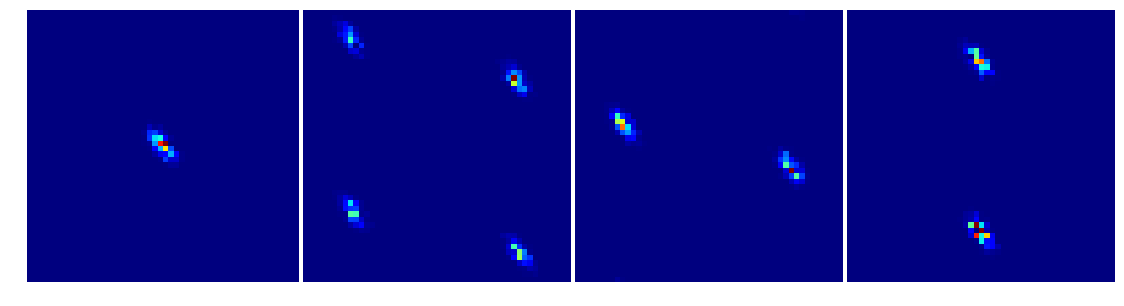

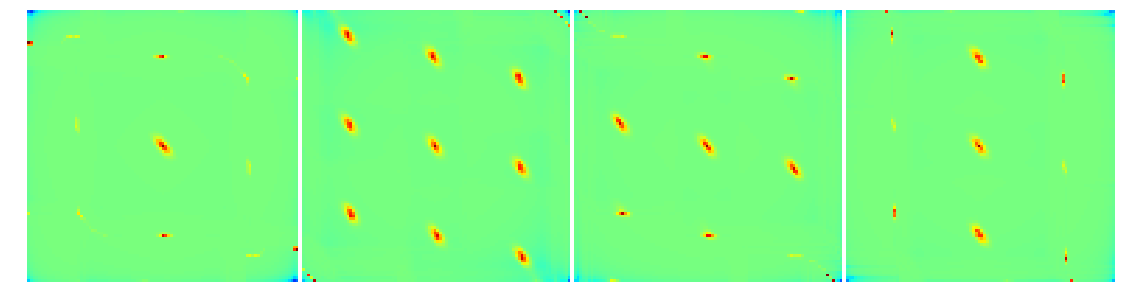

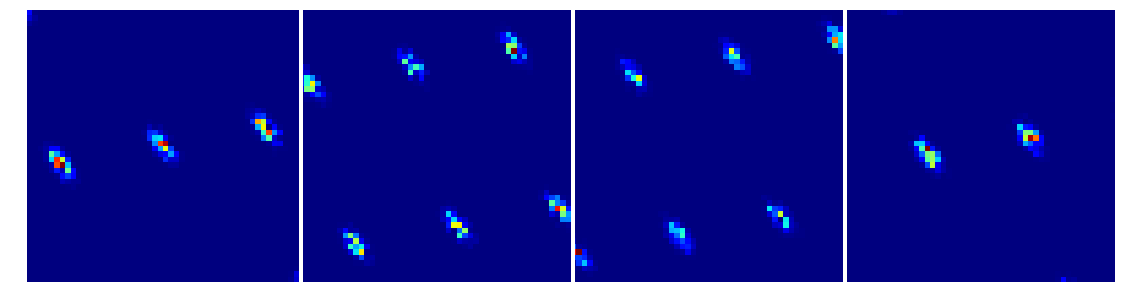

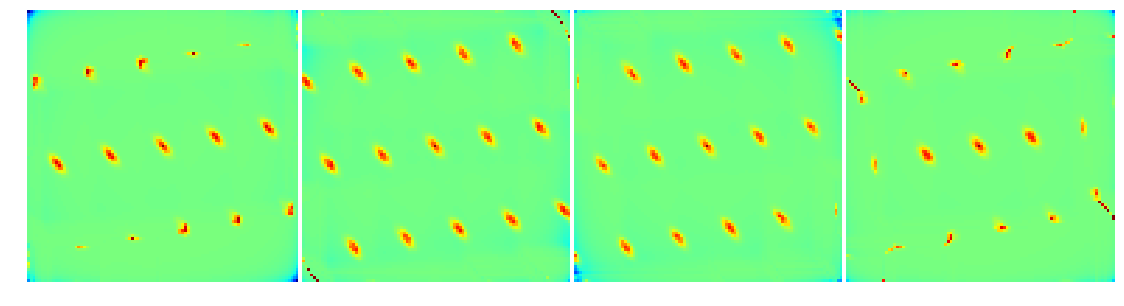

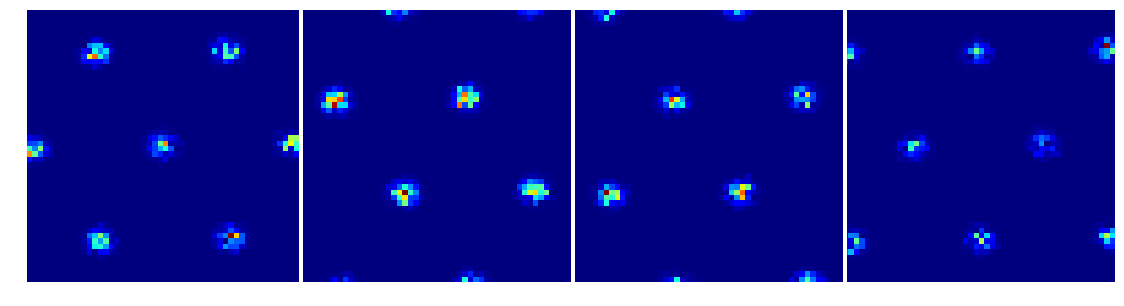

9 of 20


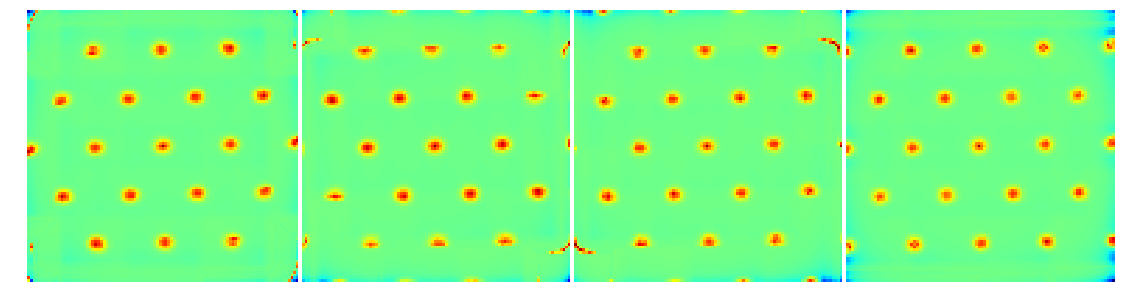

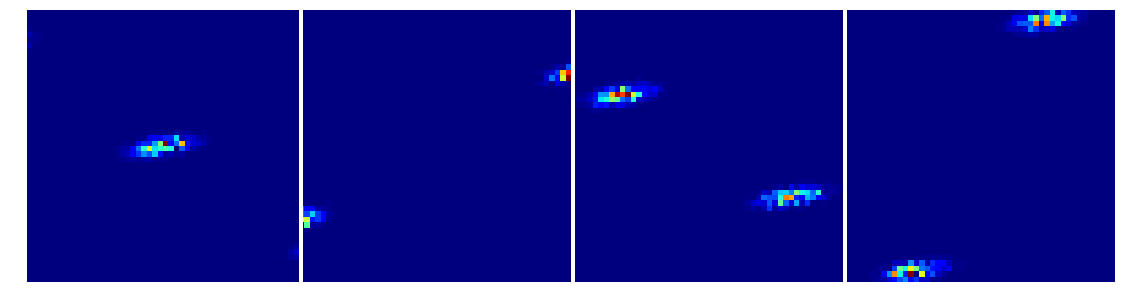

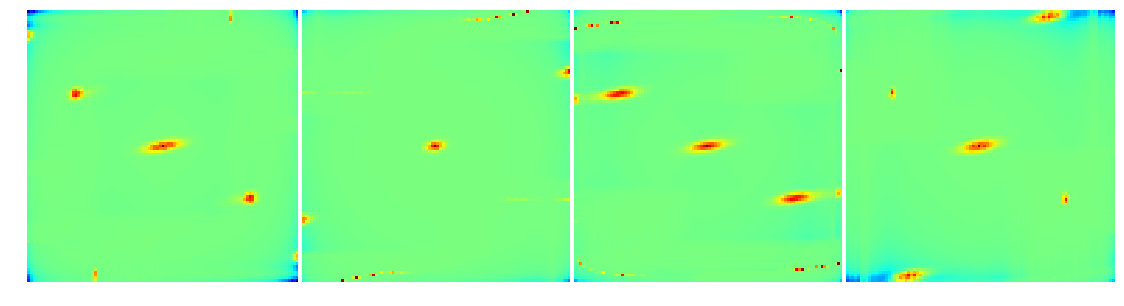

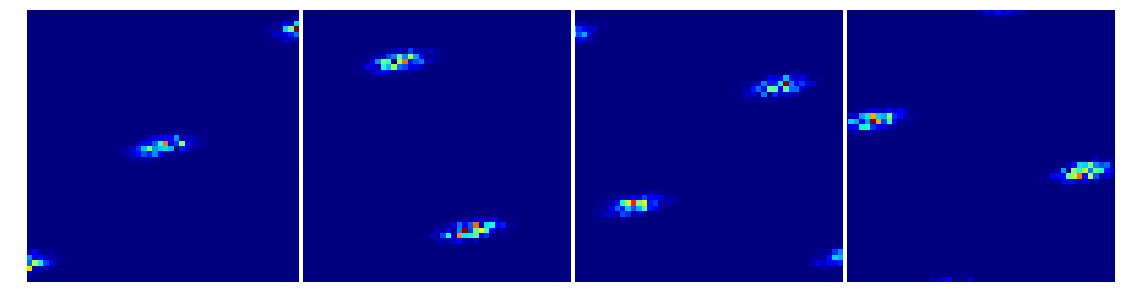

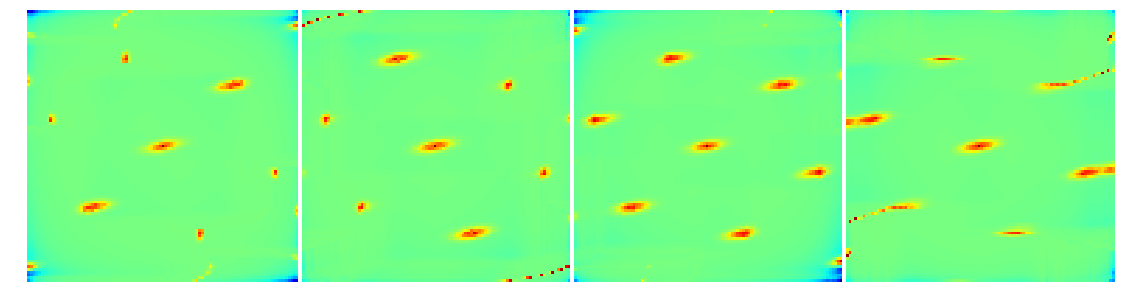

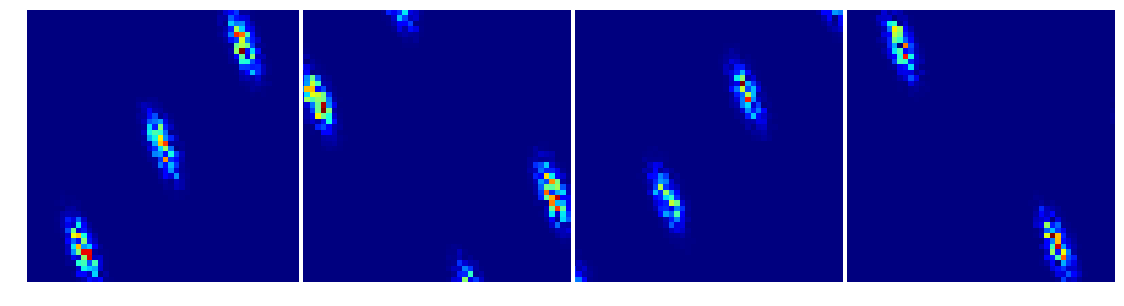

10 of 20


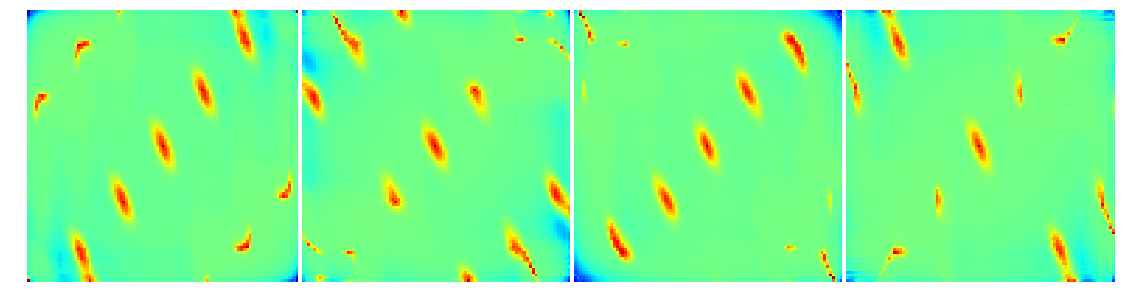

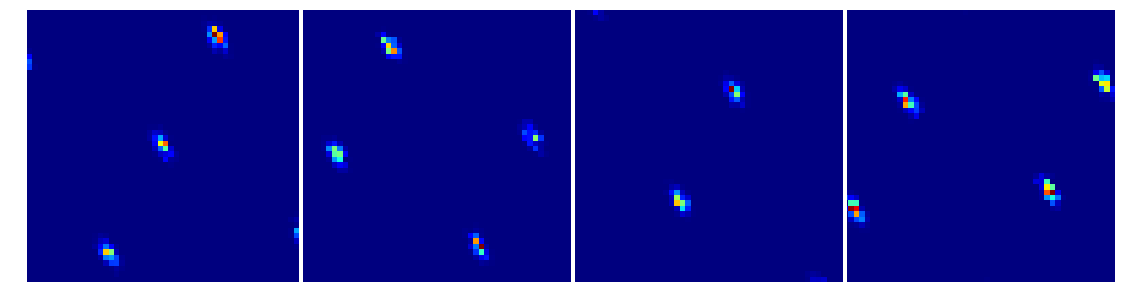

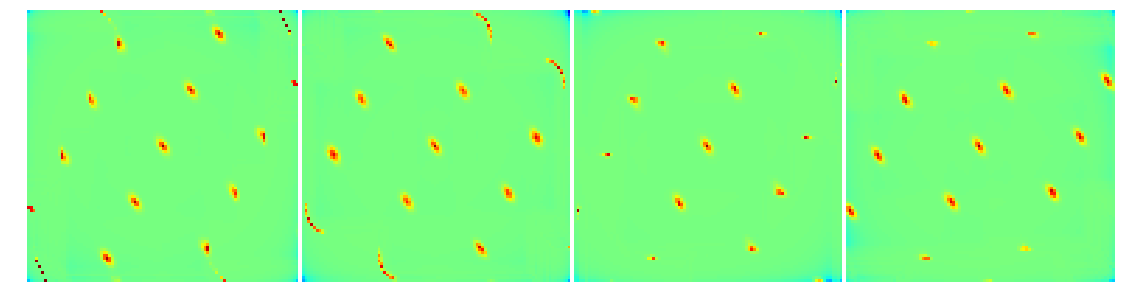

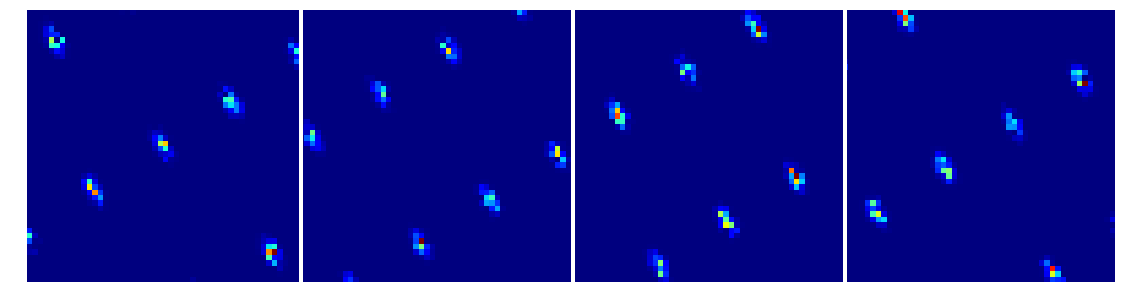

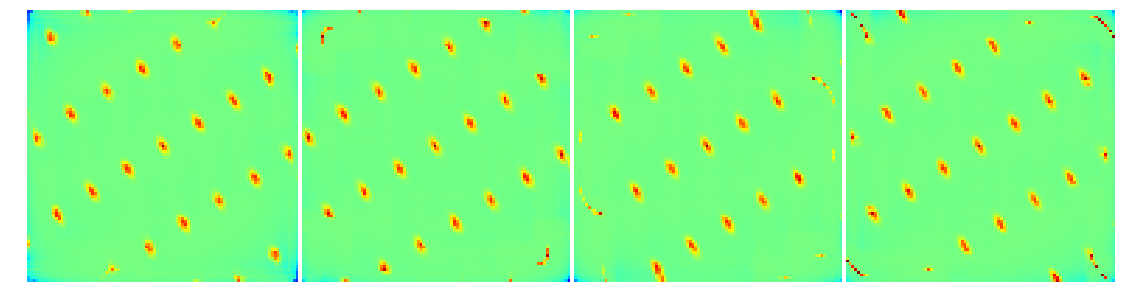

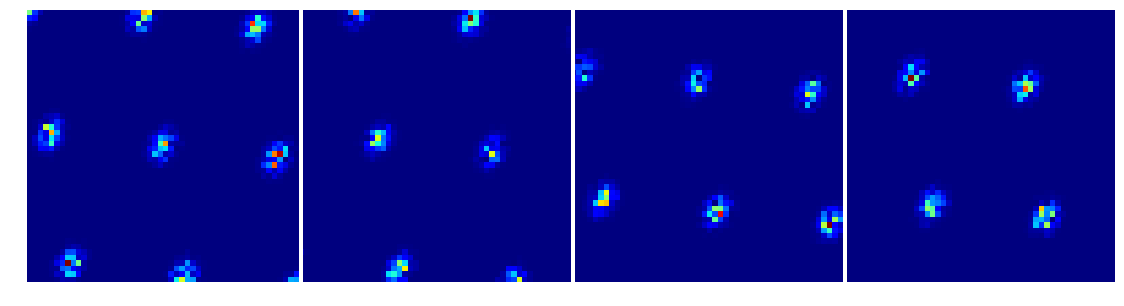

11 of 20


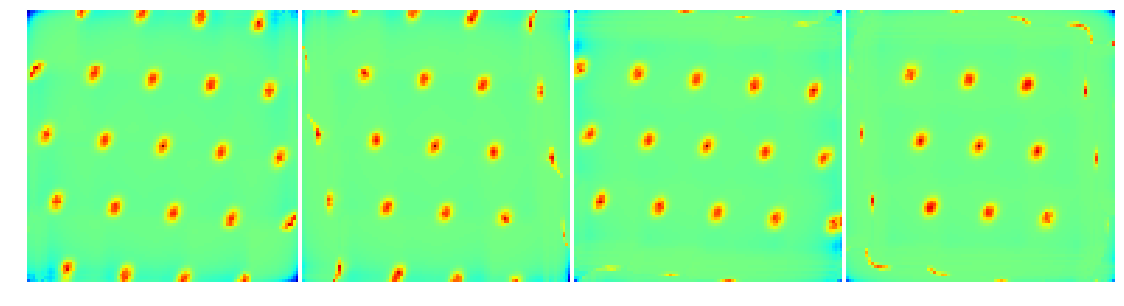

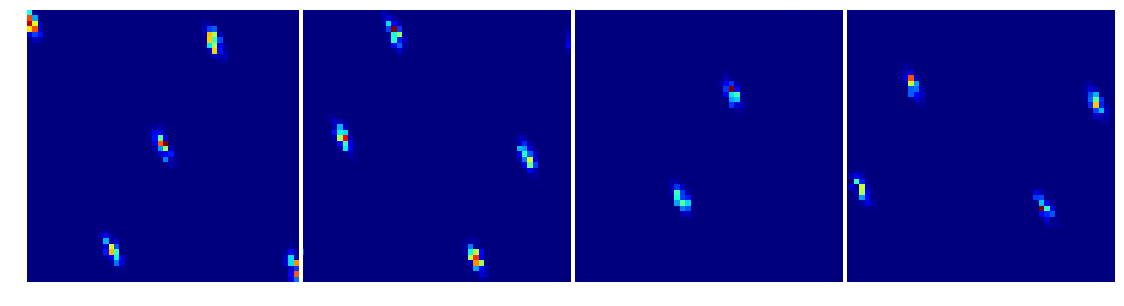

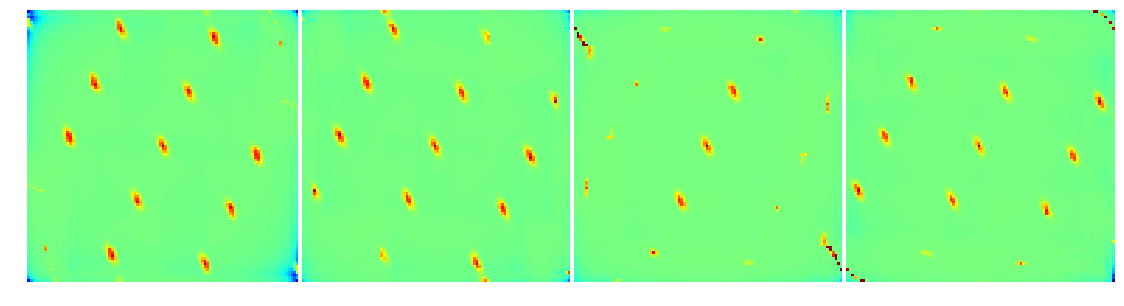

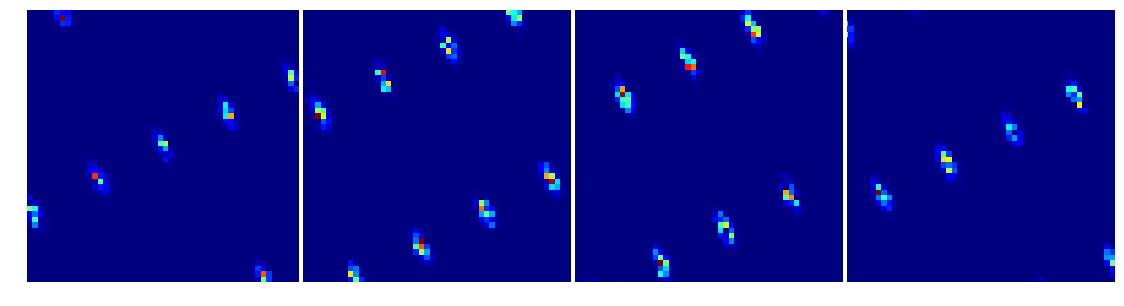

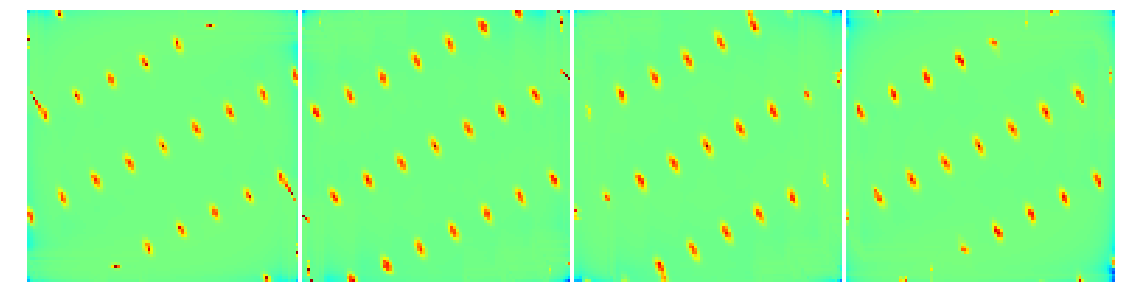

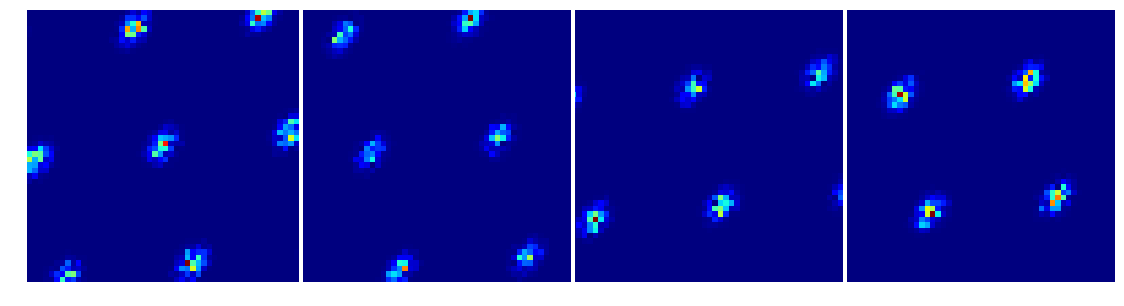

12 of 20


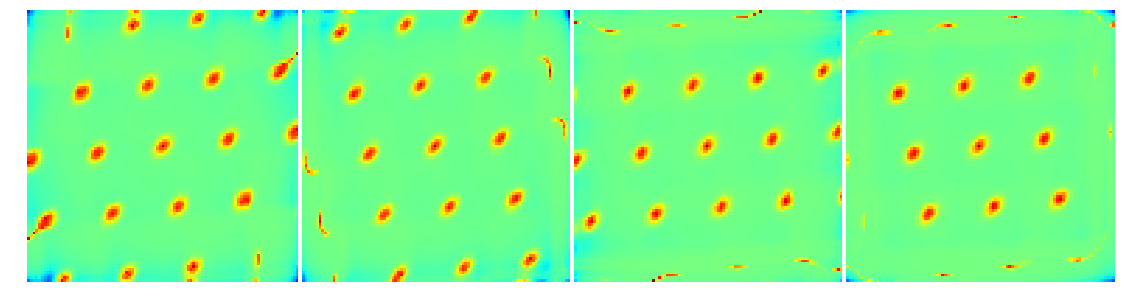

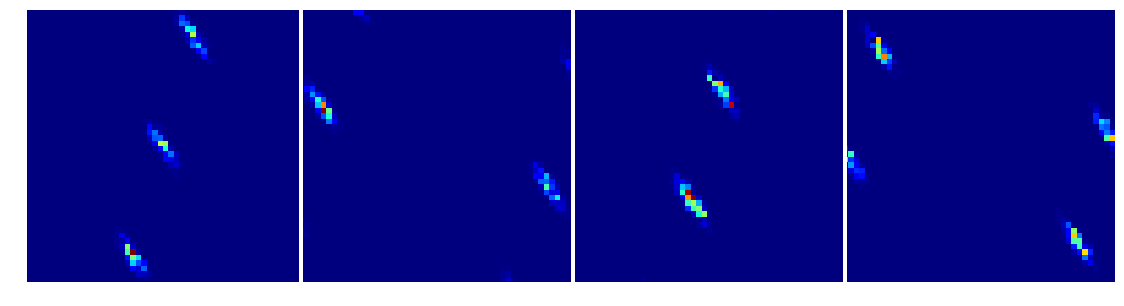

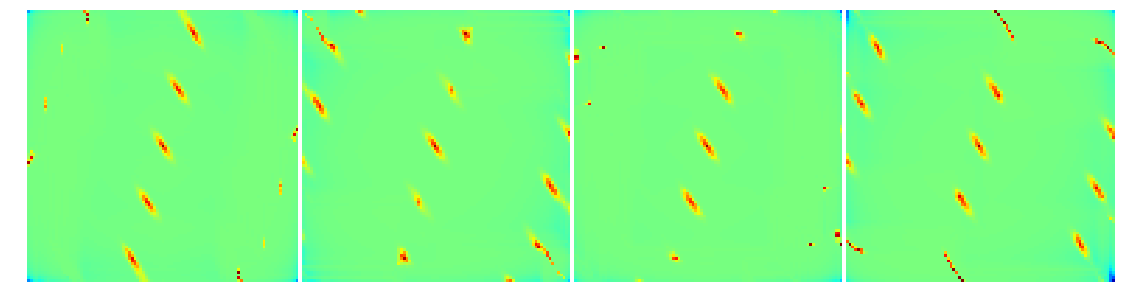

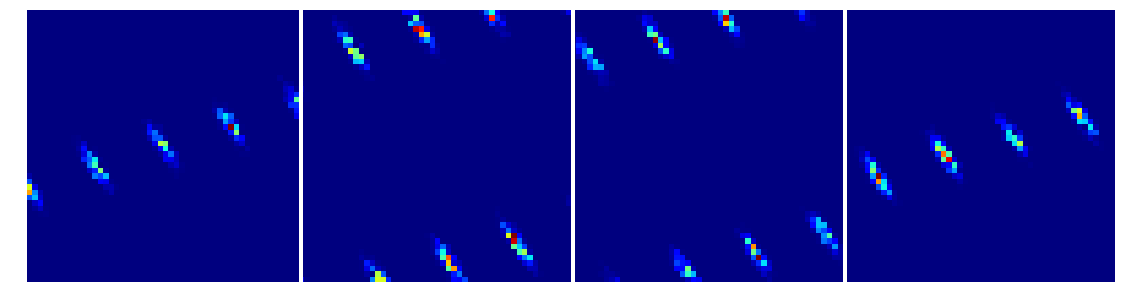

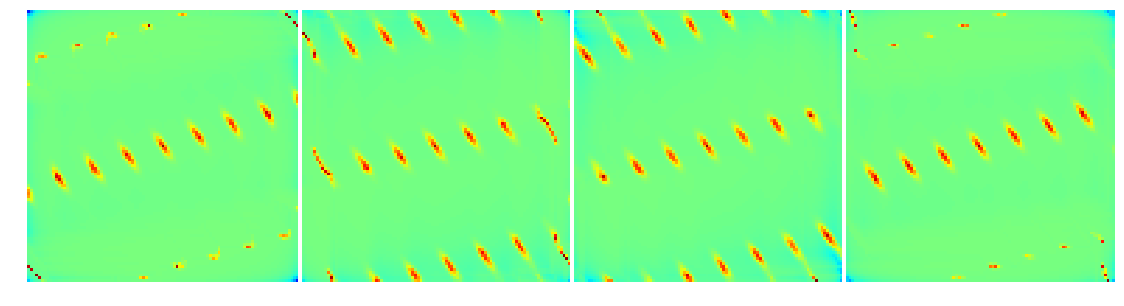

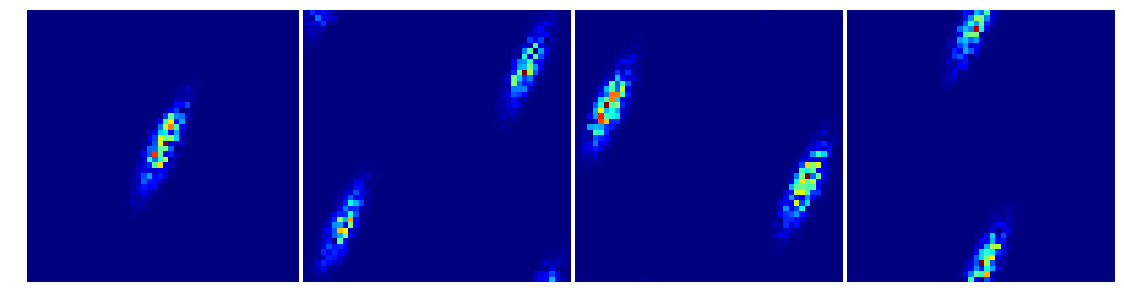

13 of 20


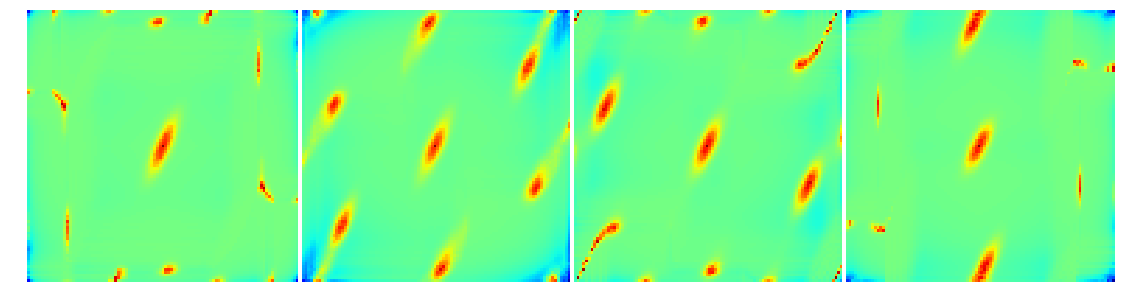

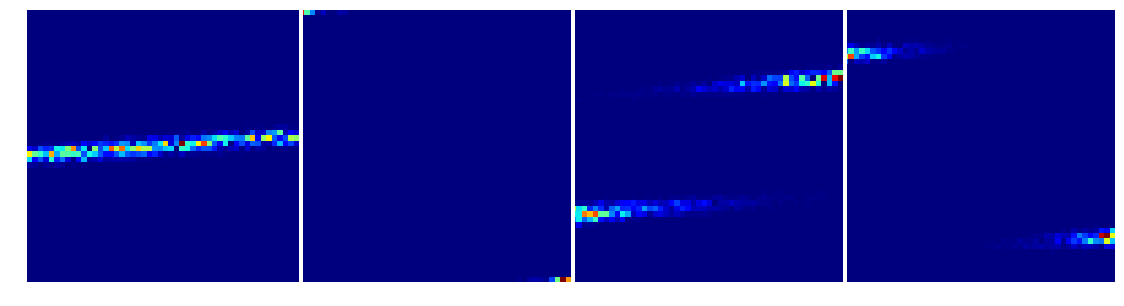

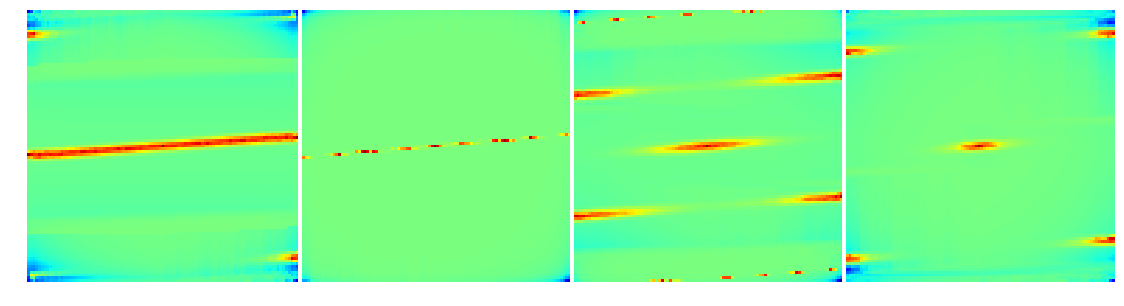

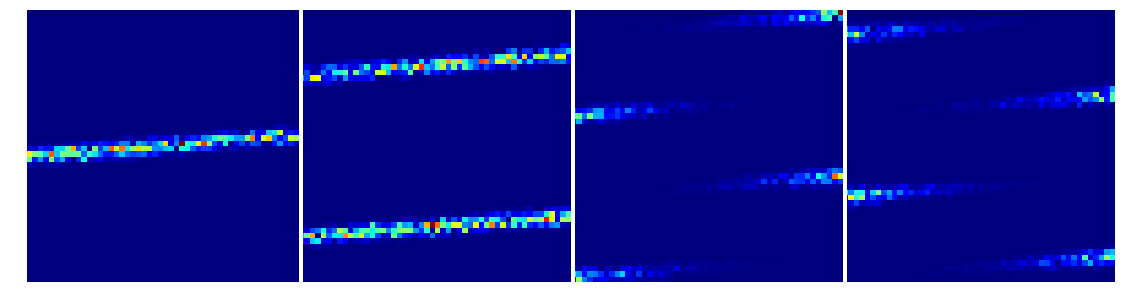

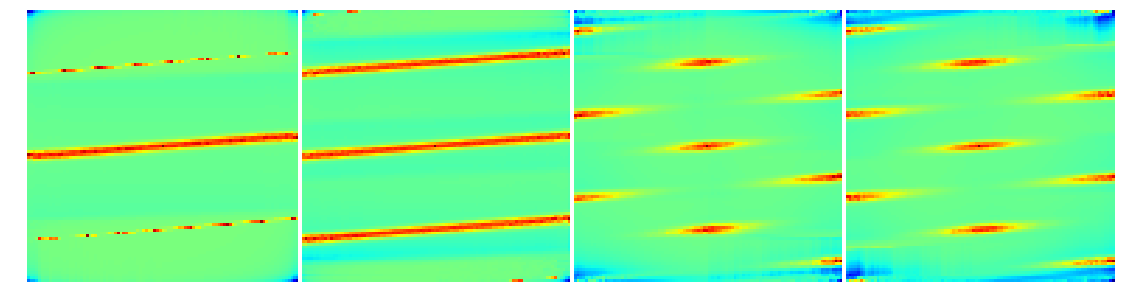

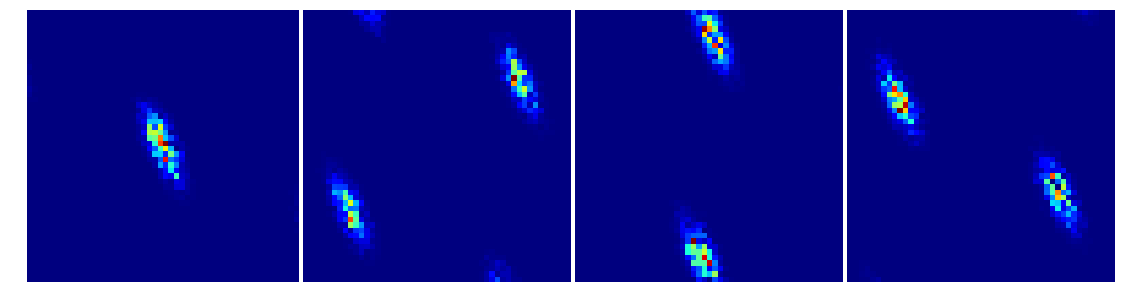

14 of 20


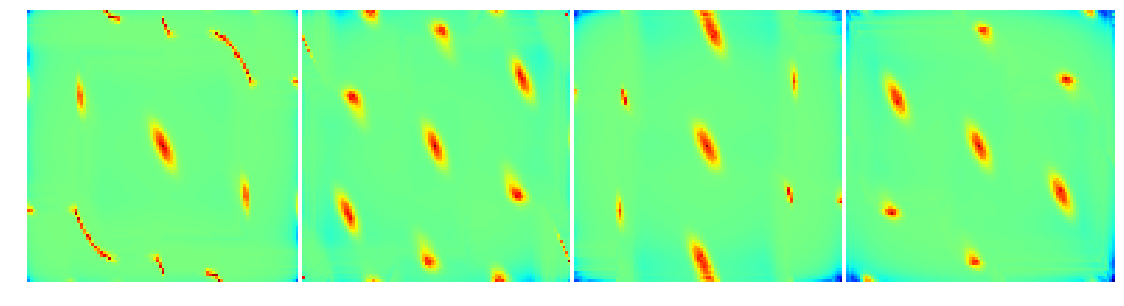

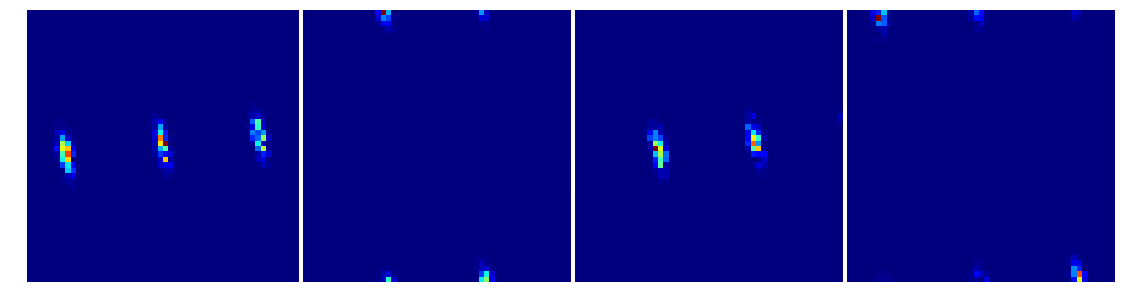

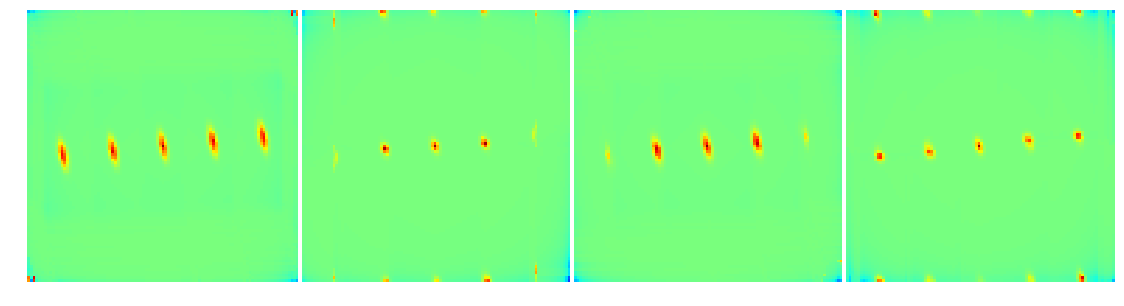

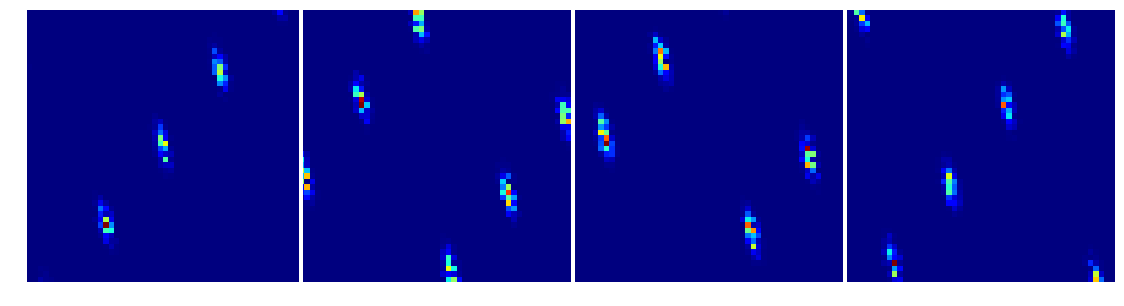

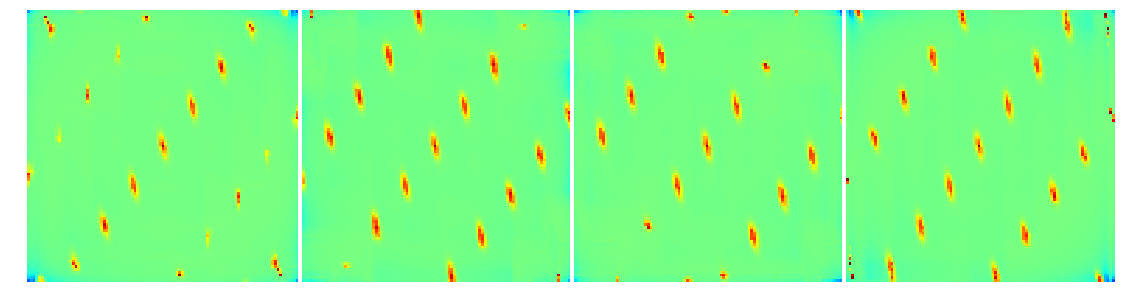

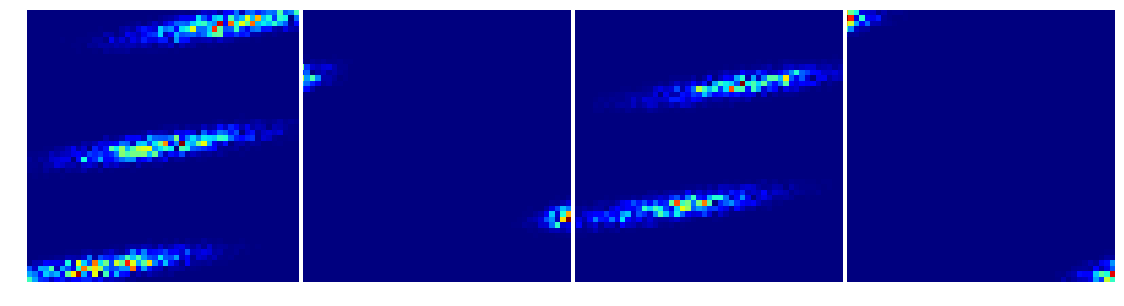

15 of 20


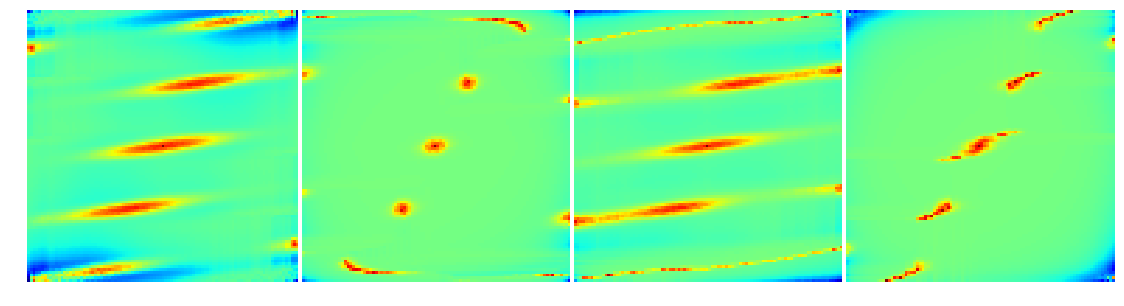

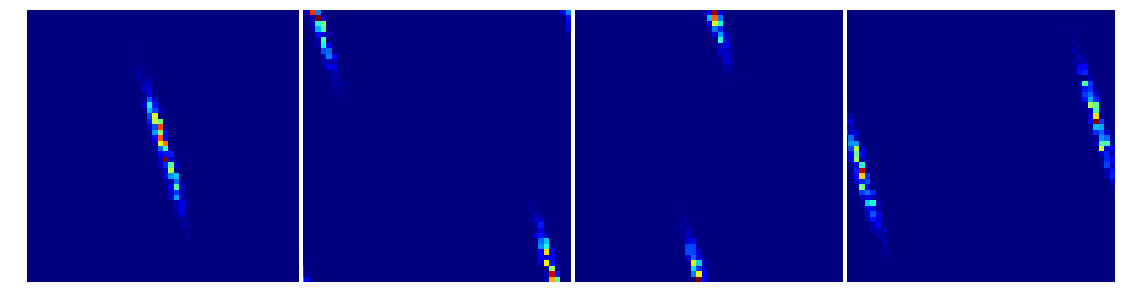

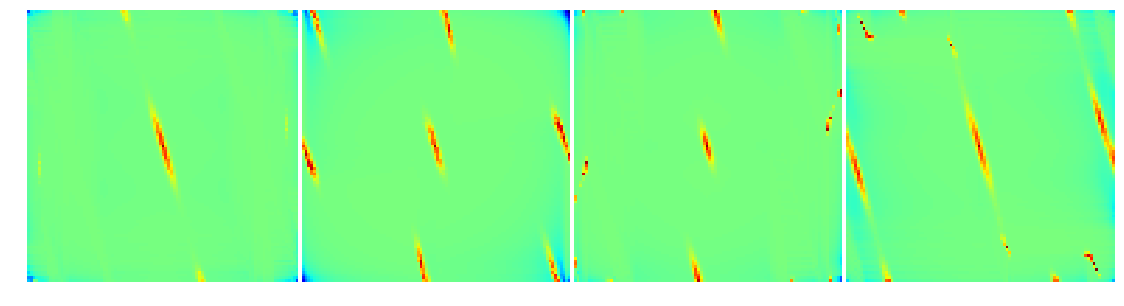

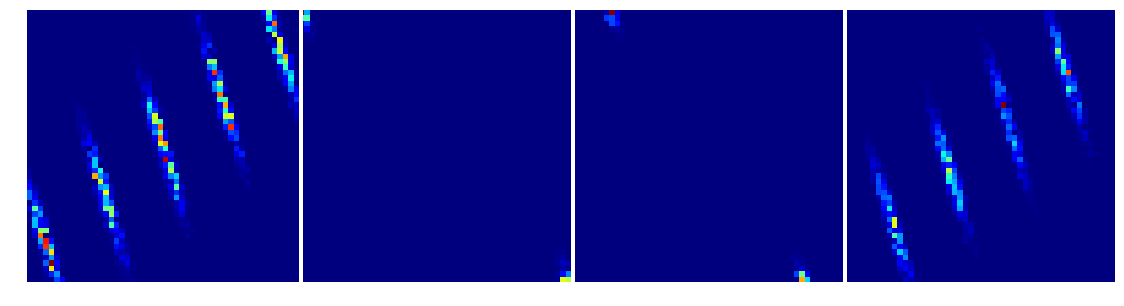

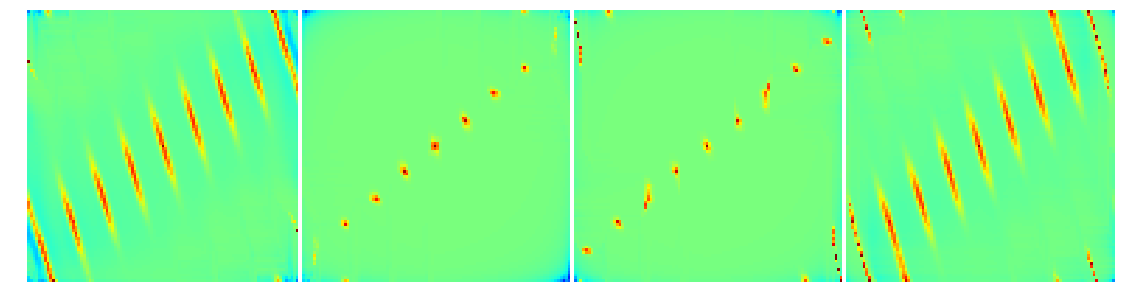

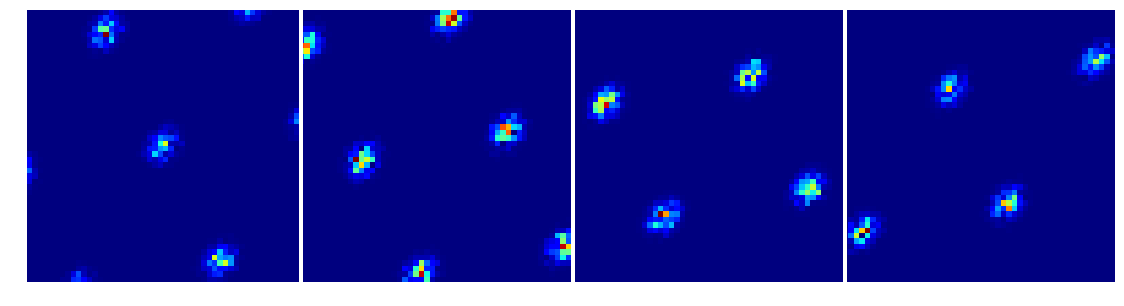

16 of 20


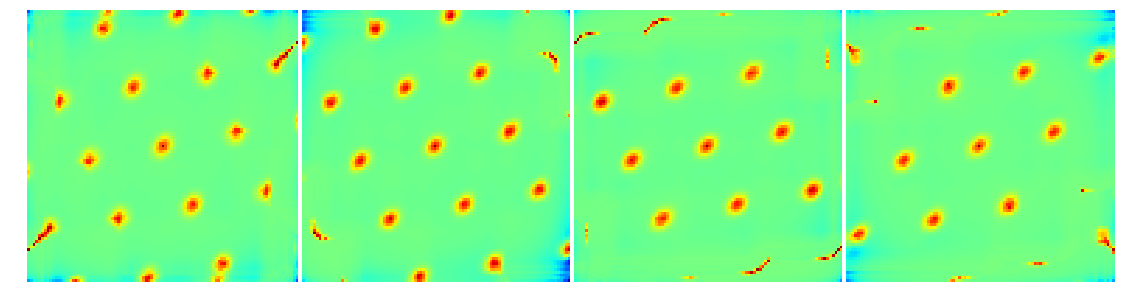

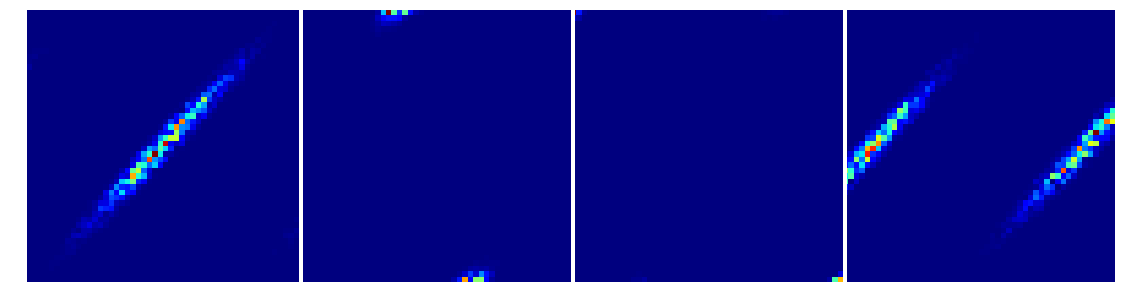

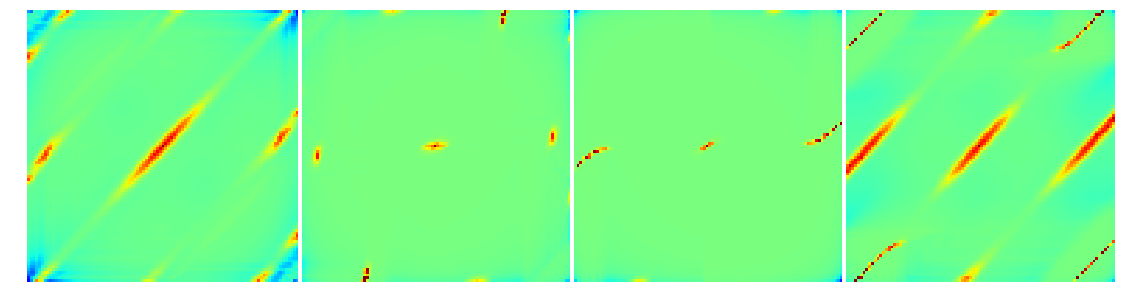

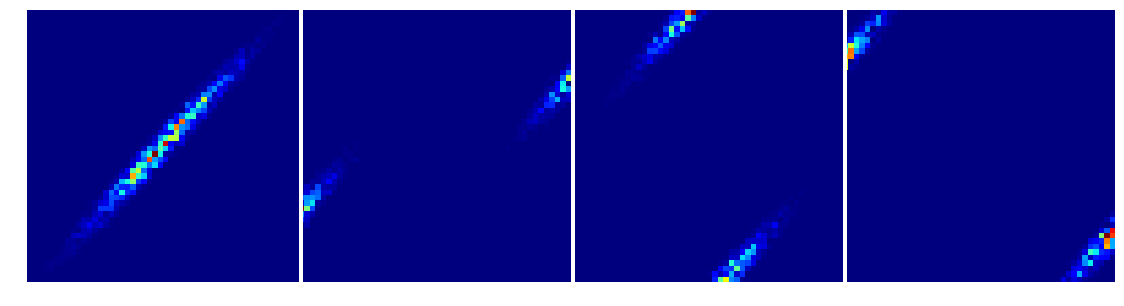

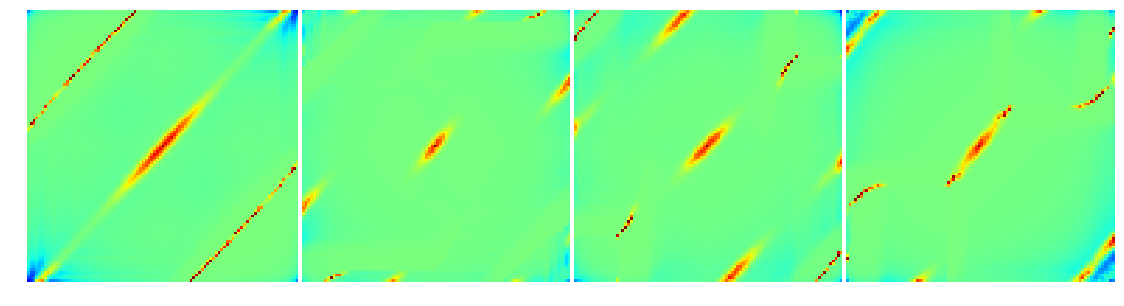

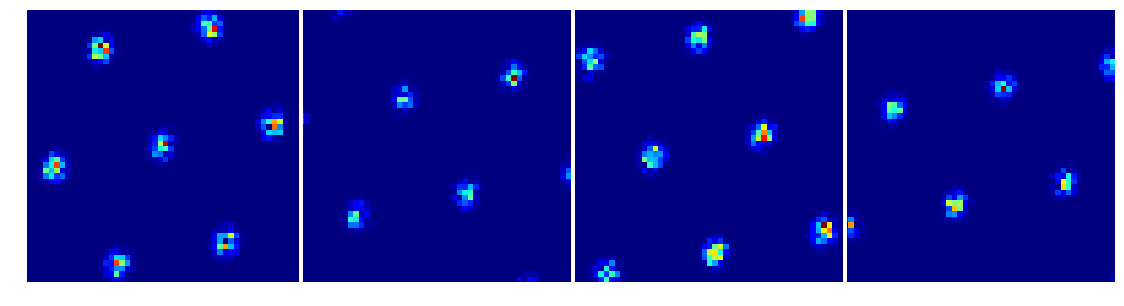

17 of 20


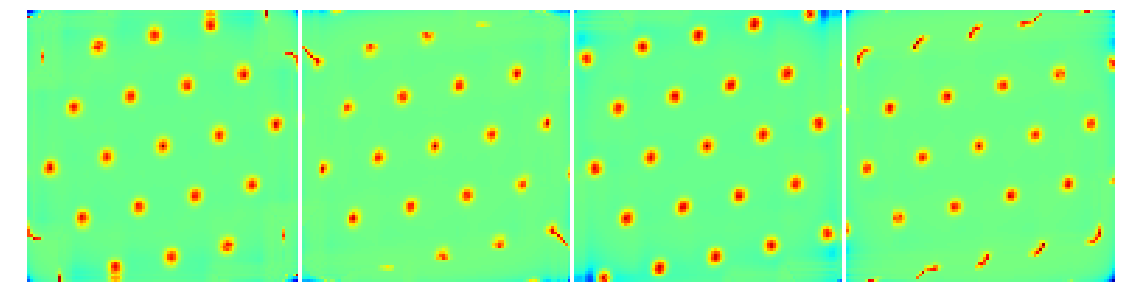

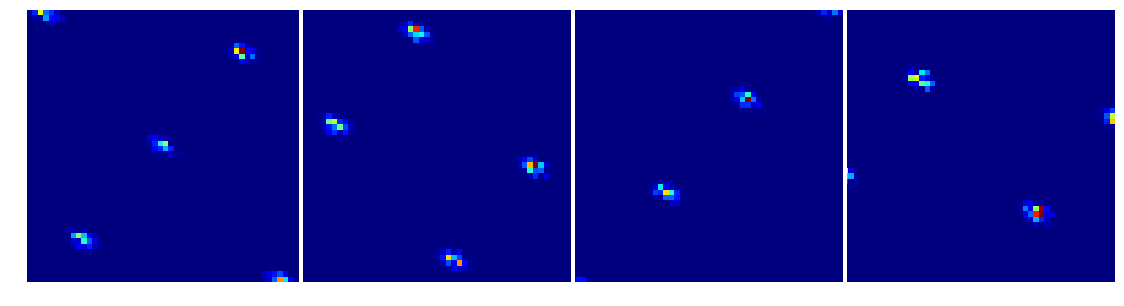

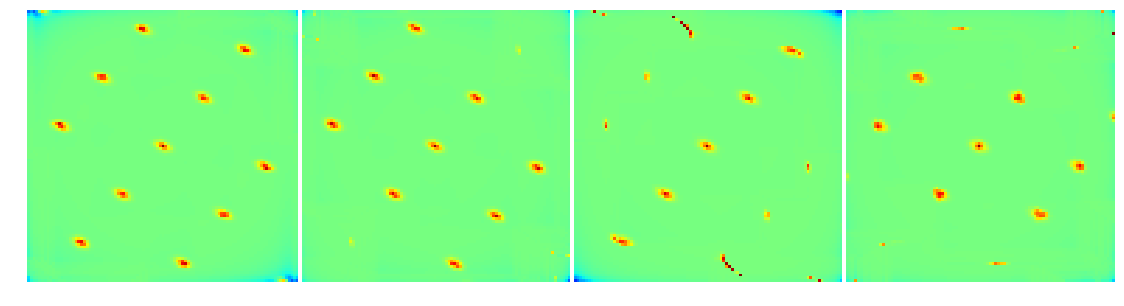

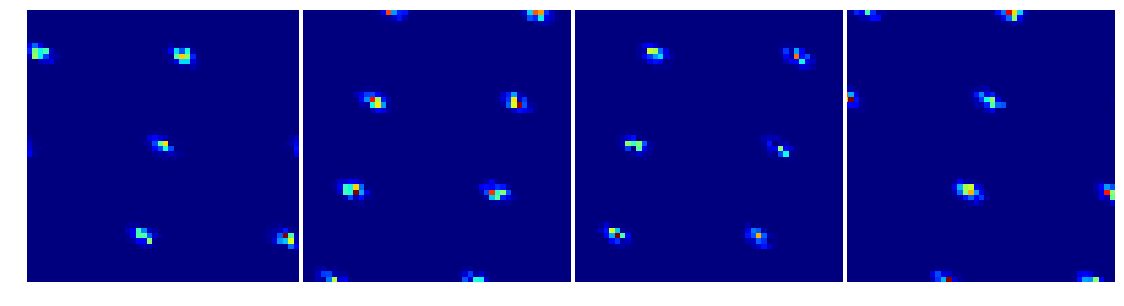

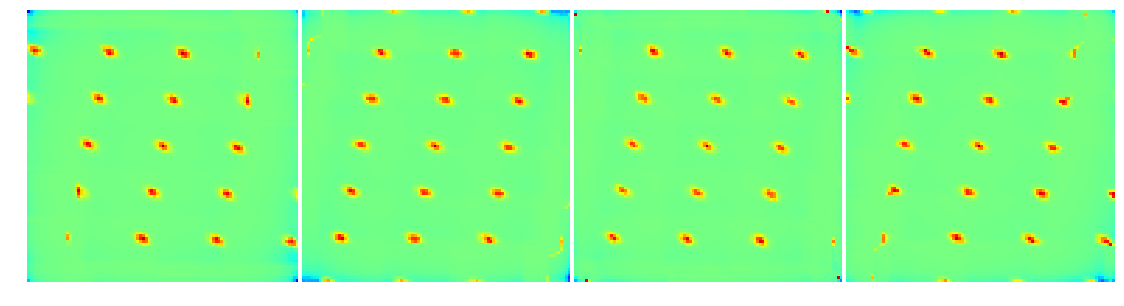

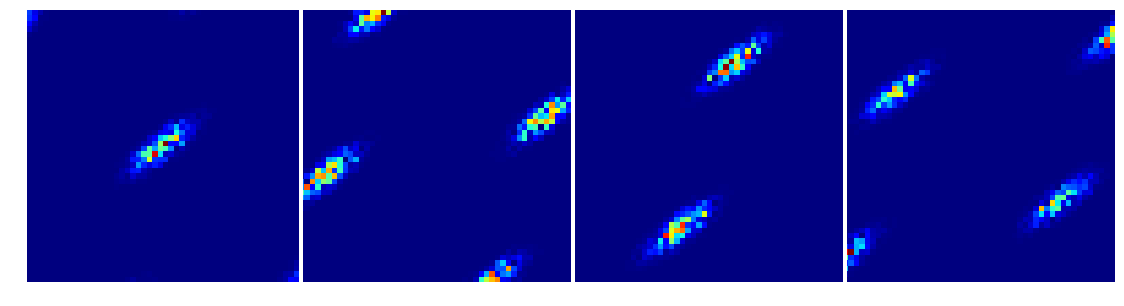

18 of 20


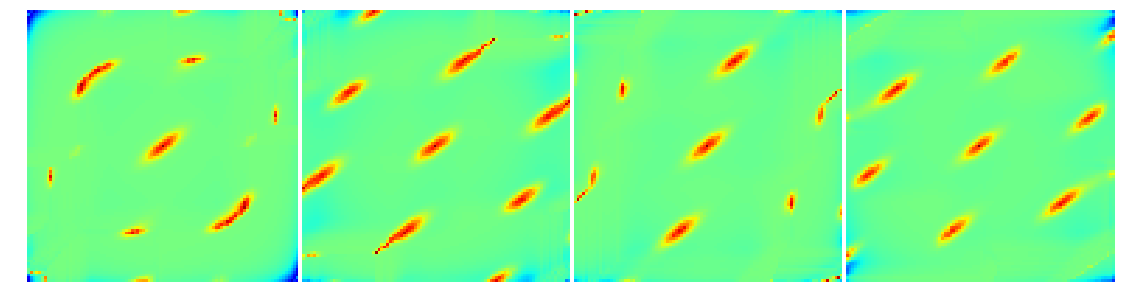

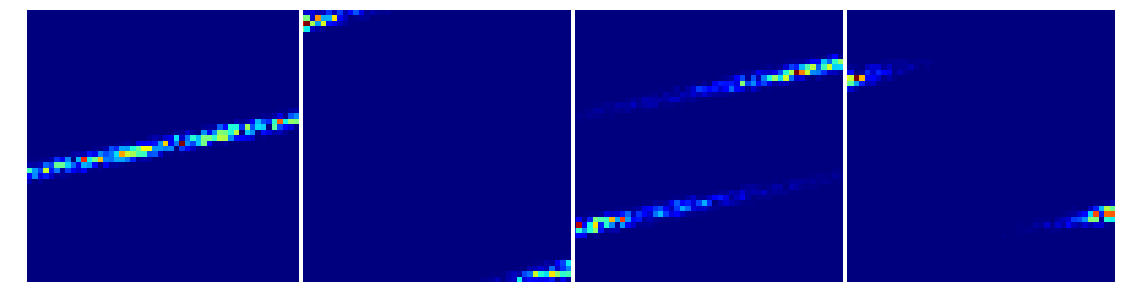

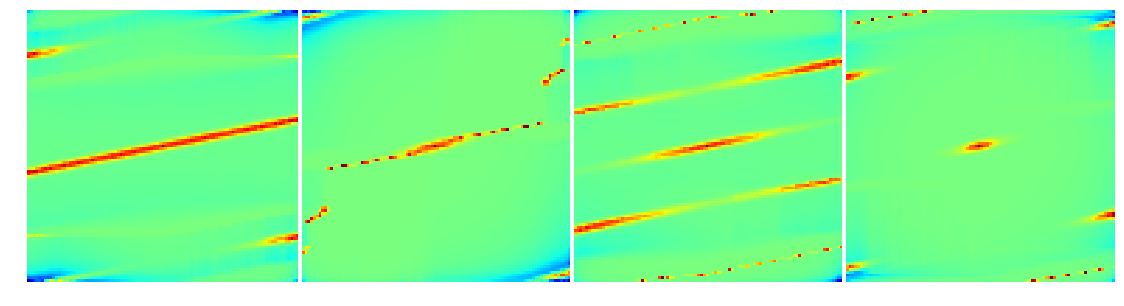

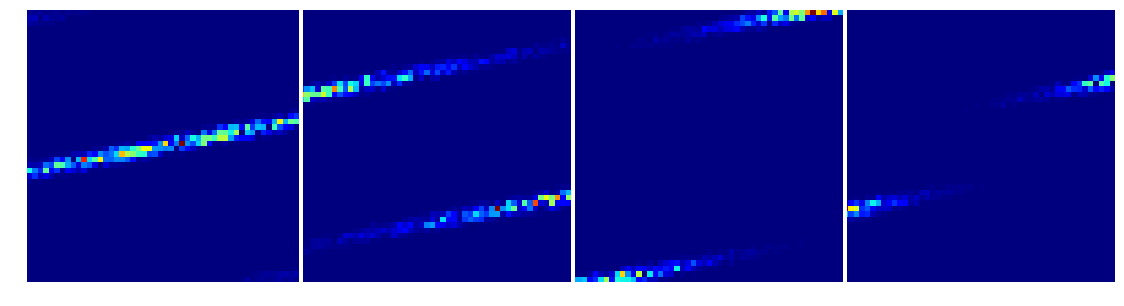

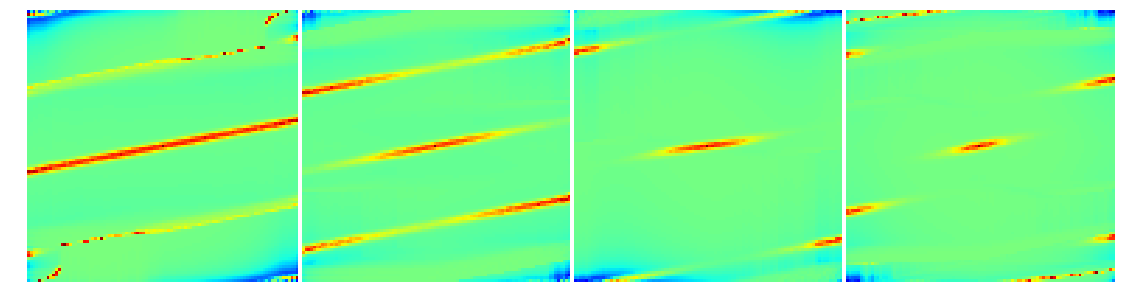

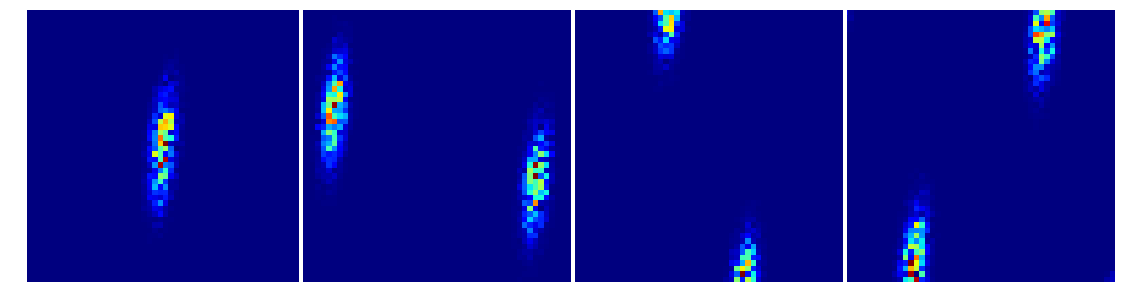

19 of 20


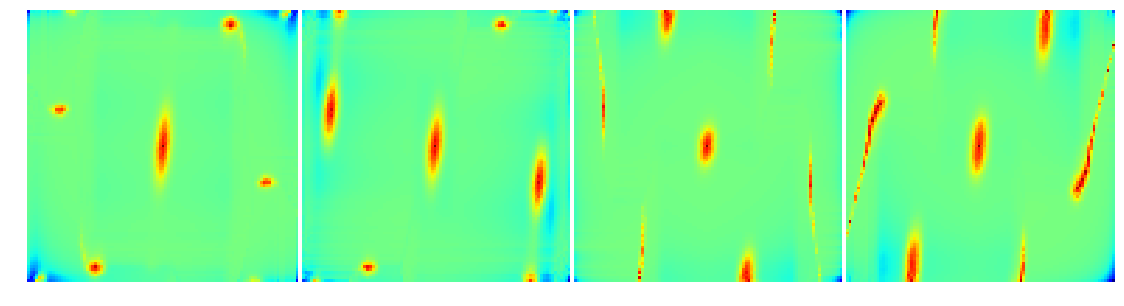

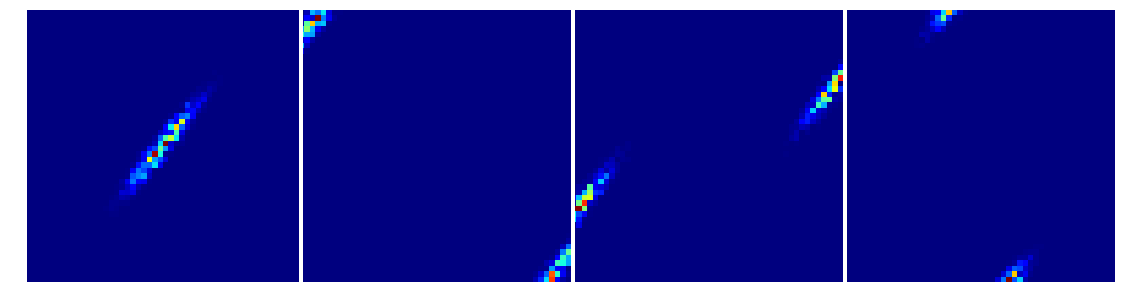

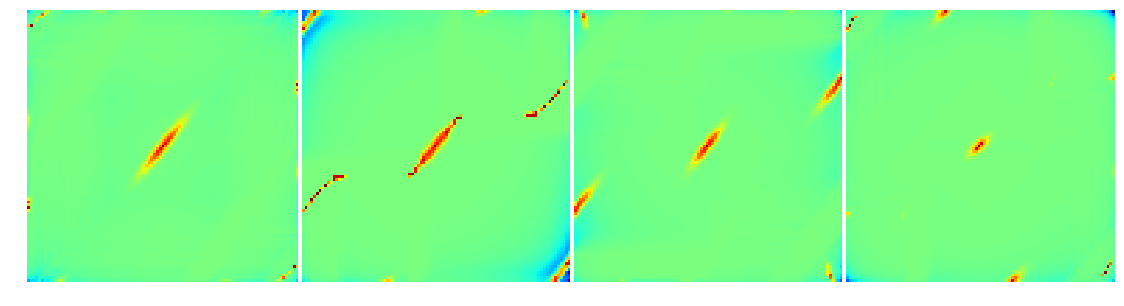

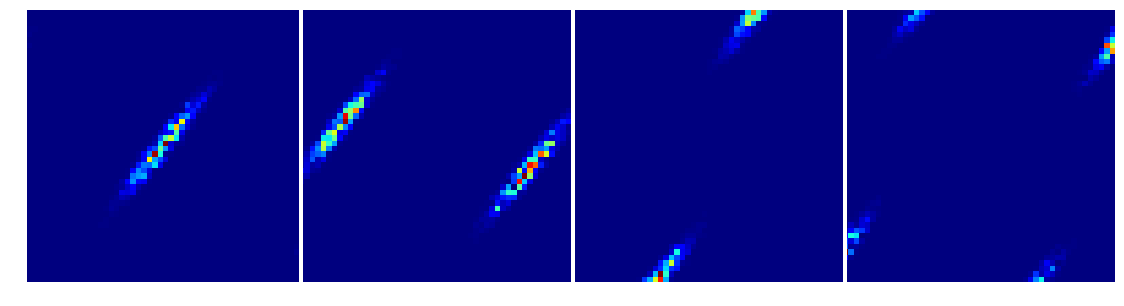

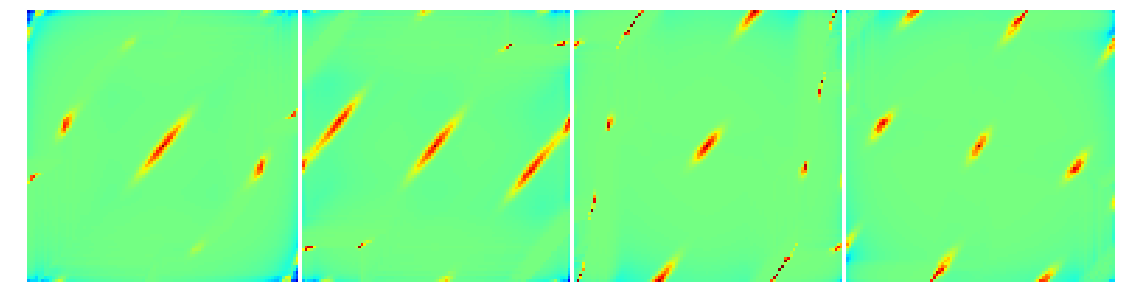

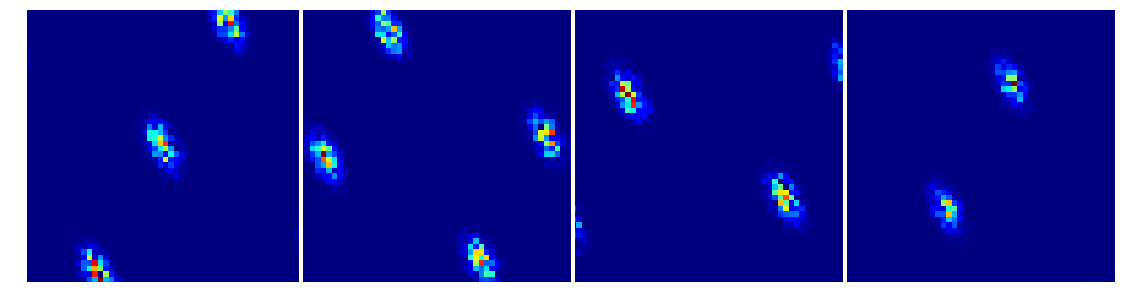

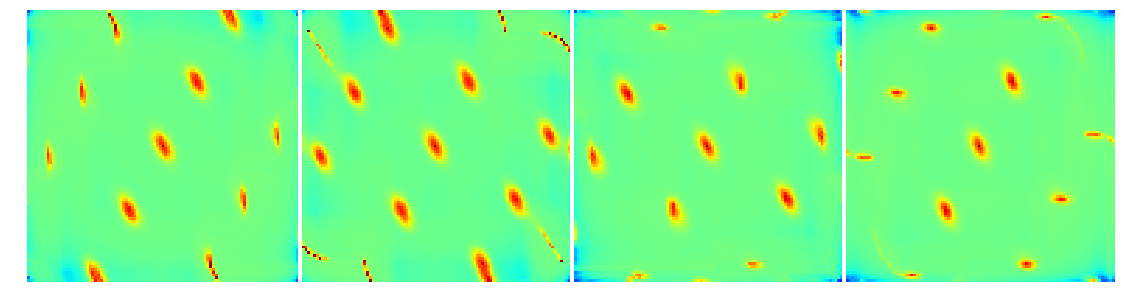

In [52]:
from htmresearch.support.gridcells.utils import cross_correlate



for row in range(len(imgs)):
    print row, "of", len(imgs)
    for im in range(m):
        plt.figure(figsize=(20,5), frameon=False)
        auto = []
        for i in range(4):
            auto.append(cross_correlate(imgs[row][0][im][i] , imgs[row][0][im][i]))


        img = np.concatenate(imgs[row][0][im][:4] , axis=1)
        plt.imshow(img, cmap="jet")


        plt.axvline(50, lw=4., linestyle='-', color="white")
        plt.axvline(100, lw=4., linestyle='-', color="white")
        plt.axvline(150, lw=4., linestyle='-', color="white")
        plt.axis('off')
        plt.show()

        plt.figure(figsize=(20,5), frameon=False)
        # img = np.concatenate([cross_correlate(im, im) for im in imgs[0][0][0]], axis=1)


        plt.axis('off')
        plt.imshow(np.concatenate(auto, axis=1) , cmap="jet", vmin=-1.)
        plt.axvline(97, lw=4., linestyle='-', color="white")
        plt.axvline(2*97, lw=4., linestyle='-', color="white")
        plt.axvline(3*97, lw=4., linestyle='-', color="white")



In [13]:
from htmresearch.support.gridcells.utils import cross_correlate

auto_cor = []

for row in imgs:
    auto_cor.append([])
    for img in row:
        auto_cor[-1].append(cross_correlate(img, img))










(97, 97)


([], <a list of 0 Text yticklabel objects>)

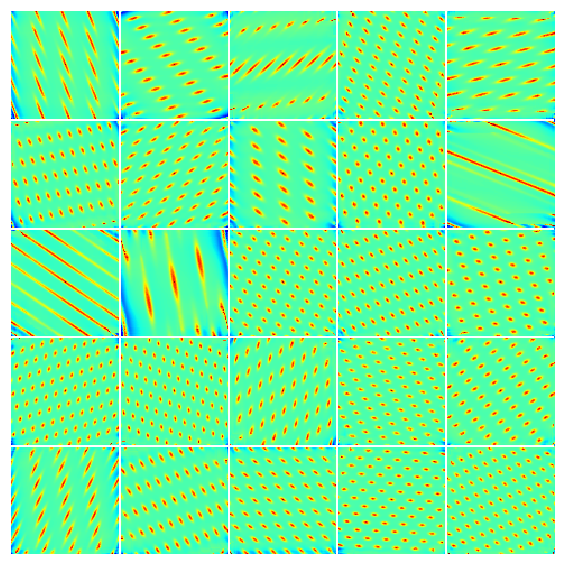

In [14]:
img = np.concatenate( [ np.concatenate(row, axis=1) for row in auto_cor ], axis=0)


print auto_cor[0][0].shape

plt.figure(figsize=(20,10), frameon=False)
# plt.title("Firing fields")
plt.imshow(img, cmap="jet")

plt.axis('off')
# plt.imshow(heat[:,::-1], cmap="jet");
# # plt.imshow(heat[:,::-1], cmap="binary");
# for i in range(shape[0]):

for i in range(1,shape[1]):
    plt.axvline(i*97, lw=2., linestyle='-', color="white")
    
for i in range(1,shape[0]):
    plt.axhline(i*97, lw=2., linestyle='-', color="white")
plt.xticks([])
plt.yticks([])



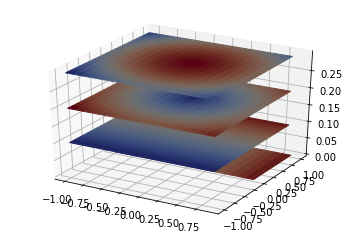

In [3]:
import numpy;
from matplotlib import pyplot;
from matplotlib import cm;
from mpl_toolkits.mplot3d import Axes3D;
# pyplot.interactive(True);
%matplotlib inline

# Creat mesh.
X = numpy.arange(-1, 1, 0.1);
Y = numpy.arange(-1, 1, 0.1);
X, Y = numpy.meshgrid(X, Y);

# Create some data to plot.
A = numpy.copy(X);
B = numpy.copy(Y);
C = numpy.sqrt(X**2 + Y**2);
D = numpy.cos(C);
# Normalize data for colormap use.
A -= numpy.min(A); A /= numpy.max(A);
B -= numpy.min(B); B /= numpy.max(B);
C -= numpy.min(C); C /= numpy.max(C);
D -= numpy.min(D); D /= numpy.max(D);

# Create flat surface.
Z = numpy.zeros_like(X);

# Plot
fig = pyplot.figure();
ax = fig.gca(projection='3d');
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors = cm.coolwarm(A));
ax.plot_surface(X, Y, Z+0.1, rstride=1, cstride=1, facecolors = cm.coolwarm(B));
ax.plot_surface(X, Y, Z+0.2, rstride=1, cstride=1, facecolors = cm.coolwarm(C));
ax.plot_surface(X, Y, Z+0.3, rstride=1, cstride=1, facecolors = cm.coolwarm(D));

In [ ]:
n=0
fig = figure()

for Nn in array([3,4]):
    n=n+1
    ax = fig.add_subplot(2,1,n,projection='3d')
    for off in arange(0,Nn*2,2)*50.:
        
        x = np.arange(-5, 5, .5)
        y = np.arange(-5, 5, .5)
        Z = np.arange(0,200,1)
        Z=np.tile(np.reshape(Z,(200,1)),(1,size(y)))
        X = np.tile(y,(200,1))
        Y = np.tile(y,(200,1))
               
        N = X*Y*Z
        N = N/N.max()  # normalize 0..1
        surf = ax.plot_surface(
            X+off, Y, Z, rstride=20, cstride=4,
            facecolors=cm.jet(N),
            linewidth=0, antialiased=False, shade=False,alpha=0.9)
        ax.plot(x+off+0.001,y,(y+5)*25.,'m')
    ax.set_xlim([-50,350])
    ax.set_ylim([-8.,8.])